# Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database:-

The database includes the following indicators:

country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

country_long (text): longer form of the country designation

name (text): name or title of the power plant, generally in Romanized form

gppd_idnr (text): 10 or 12 character identifier for the power plant

capacity_mw (number): electrical generating capacity in megawatts

latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

primary_fuel (text): energy source used in primary electricity generation or export

other_fuel1 (text): energy source used in electricity generation or export

other_fuel2 (text): energy source used in electricity generation or export

other_fuel3 (text): energy source used in electricity generation or export

commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available

owner (text): majority shareholder of the power plant, generally in Romanized form

source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

url (text): web document corresponding to the source field

geolocation_source (text): attribution for geolocation information

wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

year_of_capacity_data (number): year the capacity information was reported

generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013

generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014

generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015

generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016

generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017

generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018

generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019

generation_data_source (text): attribution for the reported generation information

estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013

estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014

estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015

estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016

estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017

'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014

estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015

estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016

estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017


We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :  We have to make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(907, 27)

In [4]:
df= df.drop_duplicates()

In [5]:
df.shape

(907, 27)

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [7]:
# Feature Selection

In [8]:
# Checking number of unique values in each column
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [9]:
# Here the columns country,country_long, other_fuel2,year_of_capacity_data and generation_data_source have only one unique value. 
# Also other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh have no unique values.
# Which means these are filled with only NAN values. 
# Since these columns have same entries thoughout the dataset so we can drop these columns.

In [10]:
# Dropping irrelevant columns
df.drop(columns=["country","country_long", "other_fuel2","year_of_capacity_data", "generation_data_source"], axis=1, inplace= True)

df.drop(columns=["other_fuel3", "wepp_id", "generation_gwh_2013", "generation_gwh_2019", "estimated_generation_gwh"], axis=1, inplace= True)

In [11]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN


In [12]:
df.shape

(907, 17)

In [13]:
df.nunique().to_frame("Unique values")

,Unique values
name,907
gppd_idnr,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
other_fuel1,3
commissioning_year,73
owner,280
source,191


In [14]:
# We can see that each power plant has unique name and hence we can drop these features

In [15]:
#Dropping the columns that has no impact on the prediction

df.drop("name",axis=1,inplace=True) 
df.drop("gppd_idnr",axis=1,inplace=True)
df.drop("url",axis=1,inplace=True)

In [16]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [17]:
# Checking null values again after feature selection
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  565
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [18]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
owner                   object
source                  object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [19]:
# 9  features are of float data types
# 5  features are of object data types

In [20]:
#fill up or replace the null
df["primary_fuel"].replace(np.nan, df["primary_fuel"].mode()[0], inplace = True)
df["other_fuel1"].replace(np.nan, df["other_fuel1"].mode()[0], inplace = True)
df["owner"].replace(np.nan, df["owner"].mode()[0], inplace = True)
df["source"].replace(np.nan, df["source"].mode()[0], inplace = True)
df["geolocation_source"].replace(np.nan, df["geolocation_source"].mode()[0], inplace = True)

df["capacity_mw"].replace(np.nan, df["capacity_mw"].mean(), inplace = True)
df["latitude"].replace(np.nan, df["latitude"].mean(), inplace = True)
df["longitude"].replace(np.nan, df["longitude"].mean(), inplace = True)
df["commissioning_year"].replace(np.nan, df["commissioning_year"].mean(), inplace = True)
df["generation_gwh_2014"].replace(np.nan, df["generation_gwh_2014"].mean(), inplace = True)
df["generation_gwh_2015"].replace(np.nan, df["generation_gwh_2015"].mean(), inplace = True)
df["generation_gwh_2016"].replace(np.nan, df["generation_gwh_2016"].mean(), inplace = True)
df["generation_gwh_2017"].replace(np.nan, df["generation_gwh_2017"].mean(), inplace = True)
df["generation_gwh_2018"].replace(np.nan, df["generation_gwh_2018"].mean(), inplace = True)

In [21]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,Oil,2011.000000,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,Coal,Oil,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,Wind,Oil,1997.091082,AES,CDM,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,Gas,Oil,2004.000000,Acc Acc ltd,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,Acc Acc ltd,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.000000,Acc Acc ltd,Central Electricity Authority,WRI,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,Oil,1997.091082,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,Wind,Oil,1997.091082,Acc Acc ltd,CDM,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,Coal,Oil,1997.091082,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [22]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
owner                  0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [23]:
# We can see there no null values so we are good to proceed further!

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,907.0,21.197918,6.079148,8.1689,17.072000,21.281800,25.176450,34.649
longitude,907.0,77.464907,4.812291,68.6447,74.388900,76.979200,79.206100,95.408
commissioning_year,907.0,1997.091082,13.016360,1927.0000,1997.091082,1997.091082,2003.000000,2018.000
generation_gwh_2014,907.0,2431.823590,2665.338608,0.0000,1211.362750,2431.823590,2431.823590,28127.000
generation_gwh_2015,907.0,2428.226946,2859.349132,0.0000,916.000000,2428.226946,2428.226946,30539.000
generation_gwh_2016,907.0,2467.936859,2877.890004,0.0000,896.500214,2467.936859,2467.936859,30015.000
generation_gwh_2017,907.0,2547.759305,2921.502193,0.0000,882.594850,2547.759305,2547.759305,35116.000
generation_gwh_2018,907.0,2600.804099,3030.808041,0.0000,824.842340,2600.804099,2600.804099,35136.000


In [25]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
owner                   object
source                  object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [26]:
# list. of object data types:

object_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        object_datatypes.append(x)
object_datatypes

['primary_fuel', 'other_fuel1', 'owner', 'source', 'geolocation_source']

In [27]:
# list of float data types:

float_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='float64':
      float_datatypes.append(x)
float_datatypes

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [28]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [29]:
columns= ['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018']

In [30]:
# EDA and Visualization

In [31]:
# countplot for object types features

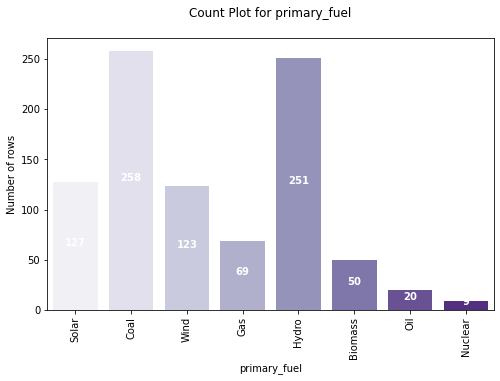

In [32]:
# primary_fuel

plt.figure(figsize=(8,5))
col_name = 'primary_fuel'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

([<matplotlib.patches.Wedge at 0x1b9d6b7be80>,
 [Text(0.6892377669074882, 0.8572930074766616, 'Coal'),
  Text(-0.9731832102764016, 0.5127518300660832, 'Hydro'),
  Text(-0.7469255087076756, -0.8075285037952407, 'Solar'),
  Text(0.1311356246113944, -1.0921554138298173, 'Wind'),
  Text(0.7771437230435309, -0.7784906124893478, 'Gas'),
  Text(1.0239280225848488, -0.40195945637026825, 'Biomass'),
  Text(1.0904854710578697, -0.14436563791877993, 'Oil'),
  Text(1.0994655650966292, -0.03428514498657132, 'Nuclear')],
 [Text(0.37594787285862985, 0.4676143677145426, '28.45%'),
  Text(-0.5308272056053099, 0.2796828163996817, '27.67%'),
  Text(-0.40741391384055026, -0.4404700929792222, '14.00%'),
  Text(0.07152852251530604, -0.595721134816264, '13.56%'),
  Text(0.42389657620556226, -0.42463124317600787, '7.61%'),
  Text(0.5585061941371902, -0.21925061256560083, '5.51%'),
  Text(0.5948102569406561, -0.0787448934102436, '2.21%'),
  Text(0.5997084900527068, -0.018700988174493446, '0.99%')])

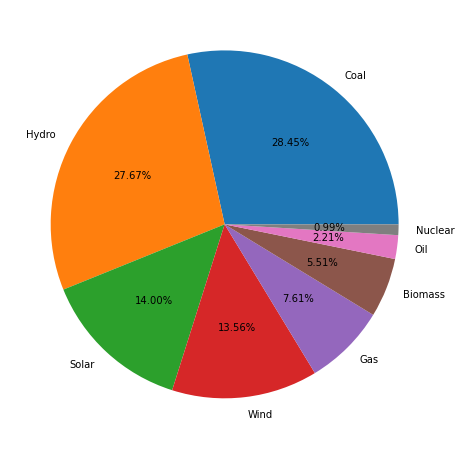

In [33]:
plt.figure(figsize=(12,8))
plt.pie(df['primary_fuel'].value_counts().values,labels=df['primary_fuel'].value_counts().index,autopct='%1.2f%%')

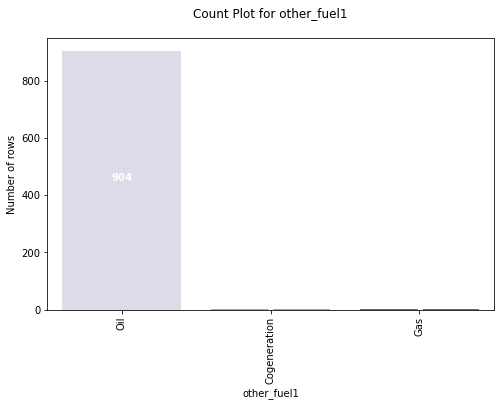

In [34]:
# other_fuel1

plt.figure(figsize=(8,5))
col_name = 'other_fuel1'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

([<matplotlib.patches.Wedge at 0x1b9d6c54b50>,
 [Text(-1.0999406146267445, 0.01142997351439728, 'Oil'),
  Text(1.0998944275928484, -0.01523968996405372, 'Gas'),
  Text(1.0999934021042412, -0.0038098985730707167, 'Cogeneration')],
 [Text(-0.5999676079782242, 0.006234531007853061, '99.67%'),
  Text(0.5999424150506445, -0.008312558162211119, '0.22%'),
  Text(0.5999964011477679, -0.002078126494402209, '0.11%')])

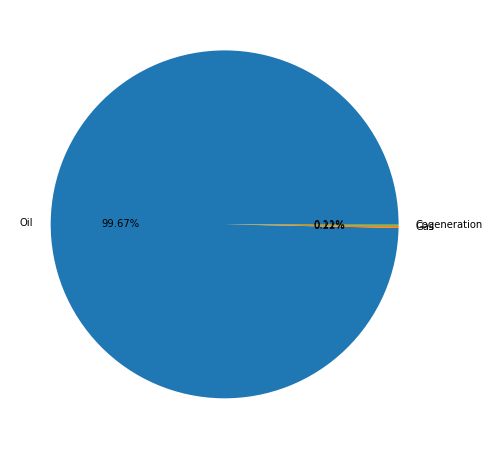

In [35]:
plt.figure(figsize=(12,8))
plt.pie(df['other_fuel1'].value_counts().values,labels=df['other_fuel1'].value_counts().index,autopct='%1.2f%%')

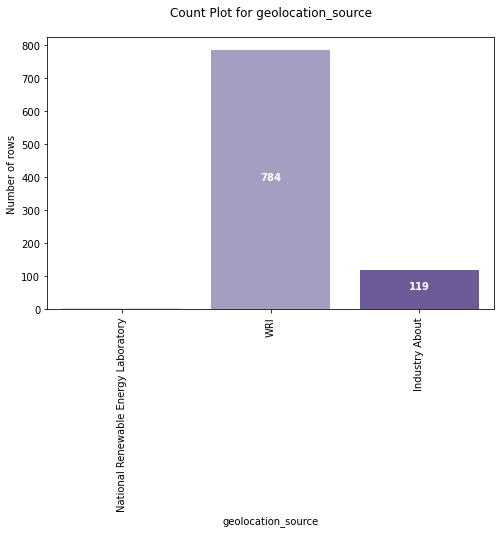

In [36]:
# geolocation_source

plt.figure(figsize=(8,5))
col_name = 'geolocation_source'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

([<matplotlib.patches.Wedge at 0x1b9d6d12c70>,
 [Text(-1.0016715864163452, 0.45459216113585, 'WRI'),
  Text(0.9952773487357389, -0.46842608711893785, 'Industry About'),
  Text(1.0998944260656753, -0.015239800184351468, 'National Renewable Energy Laboratory')],
 [Text(-0.546366319863461, 0.2479593606195545, '86.44%'),
  Text(0.5428785538558575, -0.2555051384285115, '13.12%'),
  Text(0.5999424142176409, -0.008312618282373526, '0.44%')])

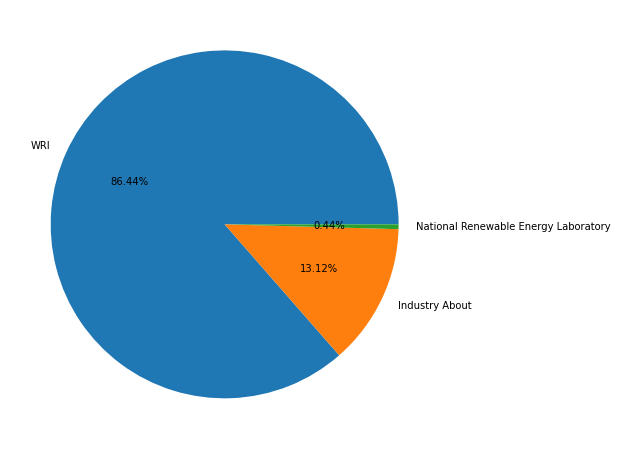

In [37]:
plt.figure(figsize=(12,8))
plt.pie(df['geolocation_source'].value_counts().values,labels=df['geolocation_source'].value_counts().index,autopct='%1.2f%%')

In [38]:
# distplot for float type features

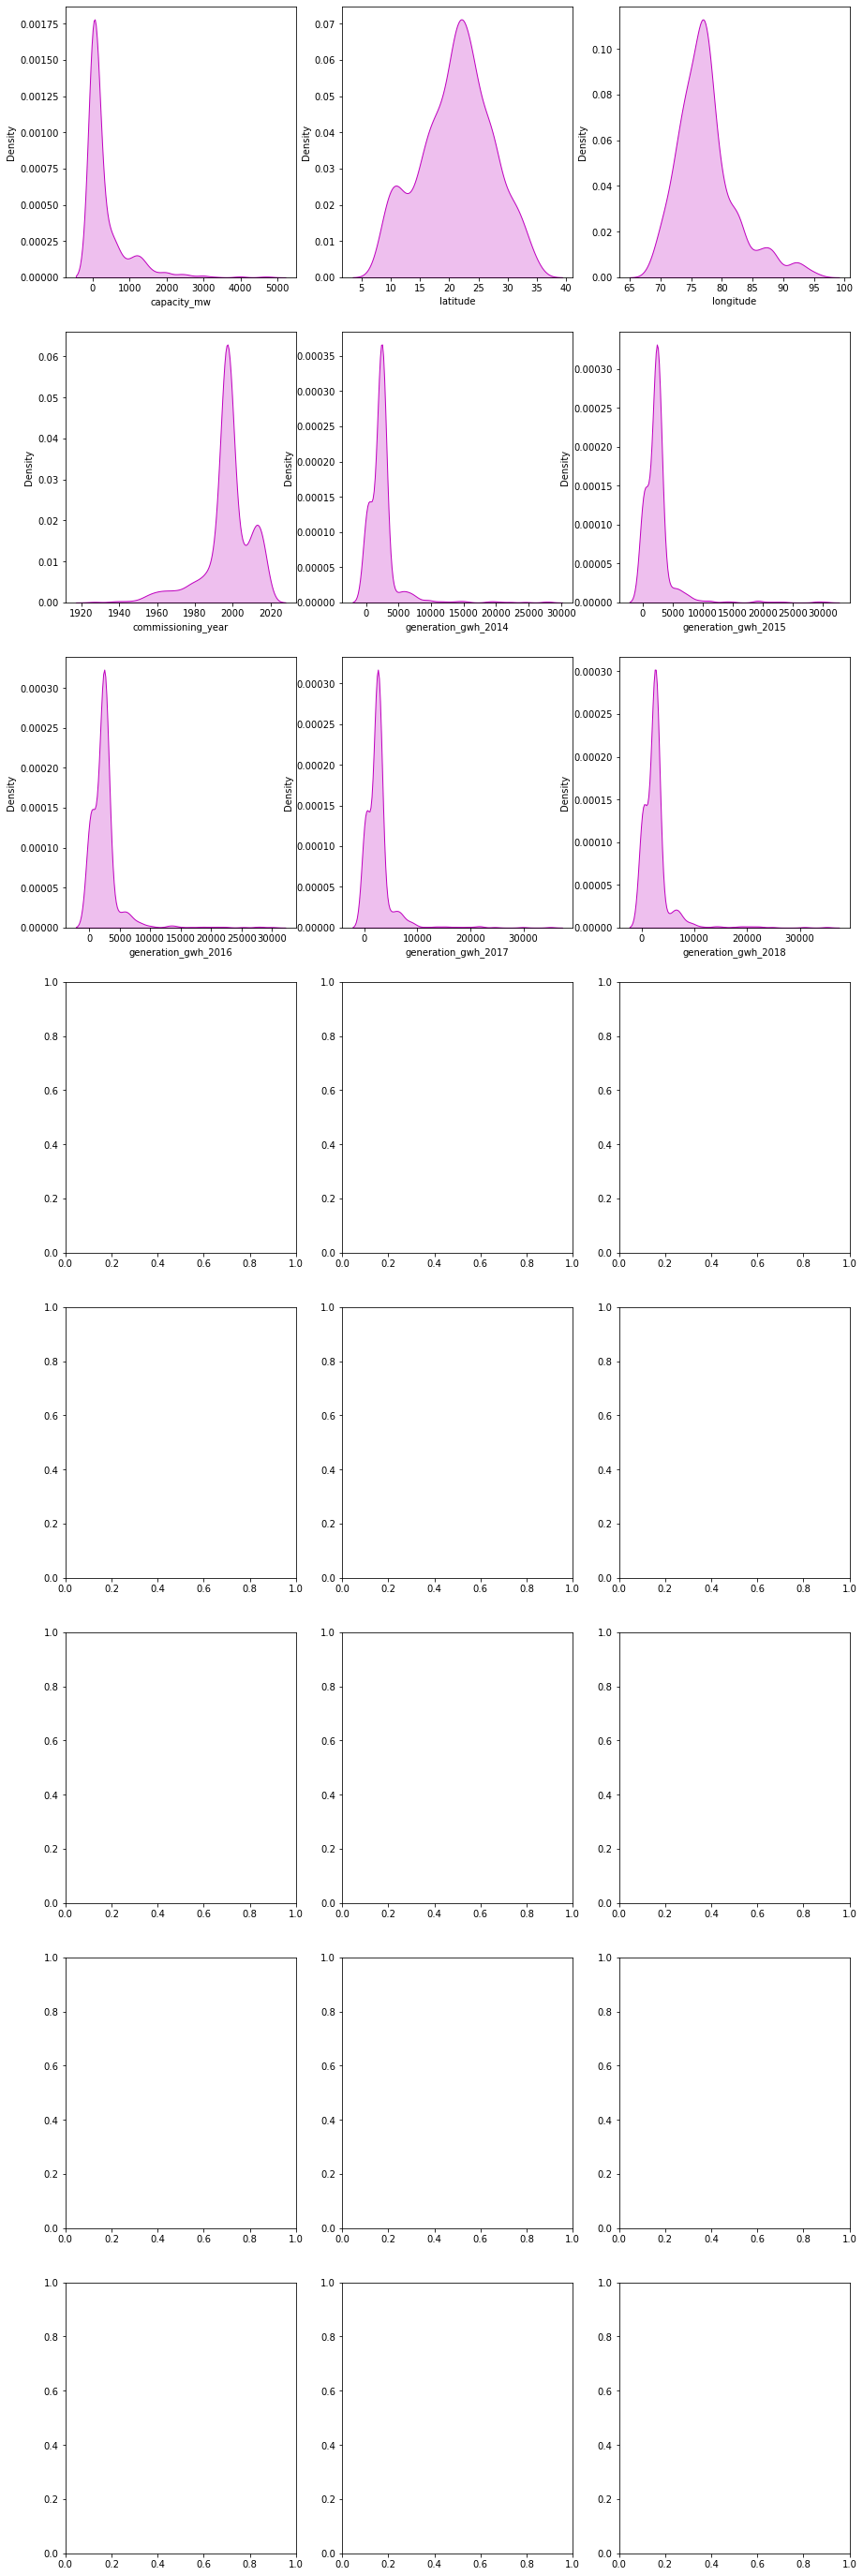

In [39]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[float_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="m", kde_kws={"shade": True})
    index += 1
plt.show()

In [40]:
# Here in the plots we can see that the data is not normally distributed. 
# Outliers and skewness is present, which needs to be treated.

In [41]:
# to check the outliers let's check the boxplots first...

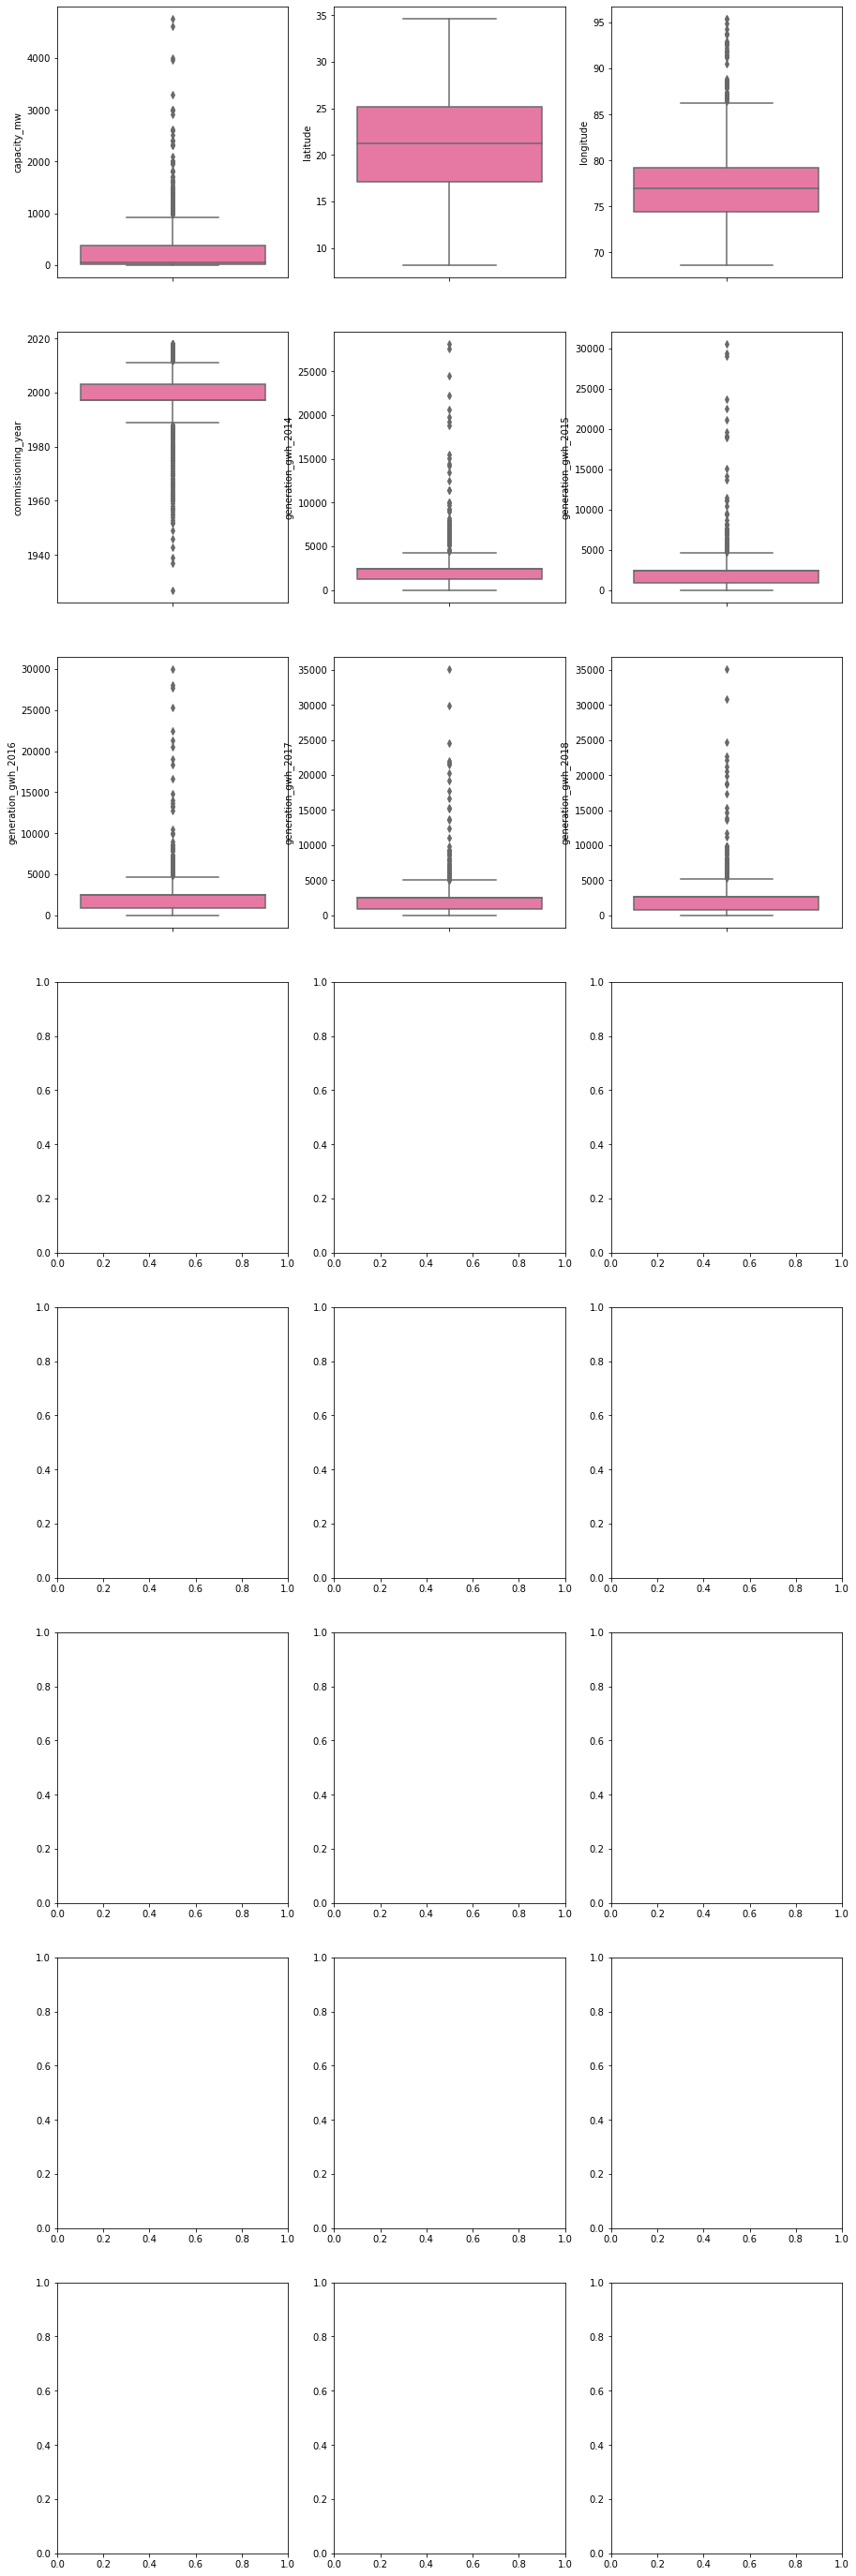

In [42]:
# Boxplot for the integer type features 

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[float_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="RdPu")
    index += 1
plt.show()

In [43]:
# In the boxplot we can notice the outliers present in all the columns except latitude. 
# Even target column has outliers but no need to remove it.

In [44]:
# Encoding the object datatype columns

In [45]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,Oil,2011.000000,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,Coal,Oil,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,Wind,Oil,1997.091082,AES,CDM,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,Gas,Oil,2004.000000,Acc Acc ltd,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,Acc Acc ltd,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.000000,Acc Acc ltd,Central Electricity Authority,WRI,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,Oil,1997.091082,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,Wind,Oil,1997.091082,Acc Acc ltd,CDM,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,Coal,Oil,1997.091082,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [46]:
object_datatypes

['primary_fuel', 'other_fuel1', 'owner', 'source', 'geolocation_source']

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[object_datatypes]= df[object_datatypes].apply(le.fit_transform)

In [48]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.000000,229,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,2,1997.091082,258,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,2,1997.091082,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2,2004.000000,5,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.000000,5,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.000000,5,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2,1997.091082,114,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,7,2,1997.091082,5,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1,2,1997.091082,91,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [49]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
other_fuel1              int32
commissioning_year     float64
owner                    int32
source                   int32
geolocation_source       int32
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [50]:
df[object_datatypes]

,primary_fuel,other_fuel1,owner,source,geolocation_source
0,6,2,229,109,1
1,1,2,258,174,2
2,7,2,2,21,2
3,2,2,5,22,2
4,1,2,5,22,2
...,...,...,...,...,...
902,1,2,5,22,2
903,6,2,114,77,0
904,7,2,5,21,2
905,1,2,91,59,2


In [51]:
df.nunique().to_frame("Unique values")

,Unique values
capacity_mw,361
latitude,837
longitude,828
primary_fuel,8
other_fuel1,3
commissioning_year,74
owner,280
source,191
geolocation_source,3
generation_gwh_2014,372


In [52]:
# we have successfully changed all the object type data into int or float type ones!

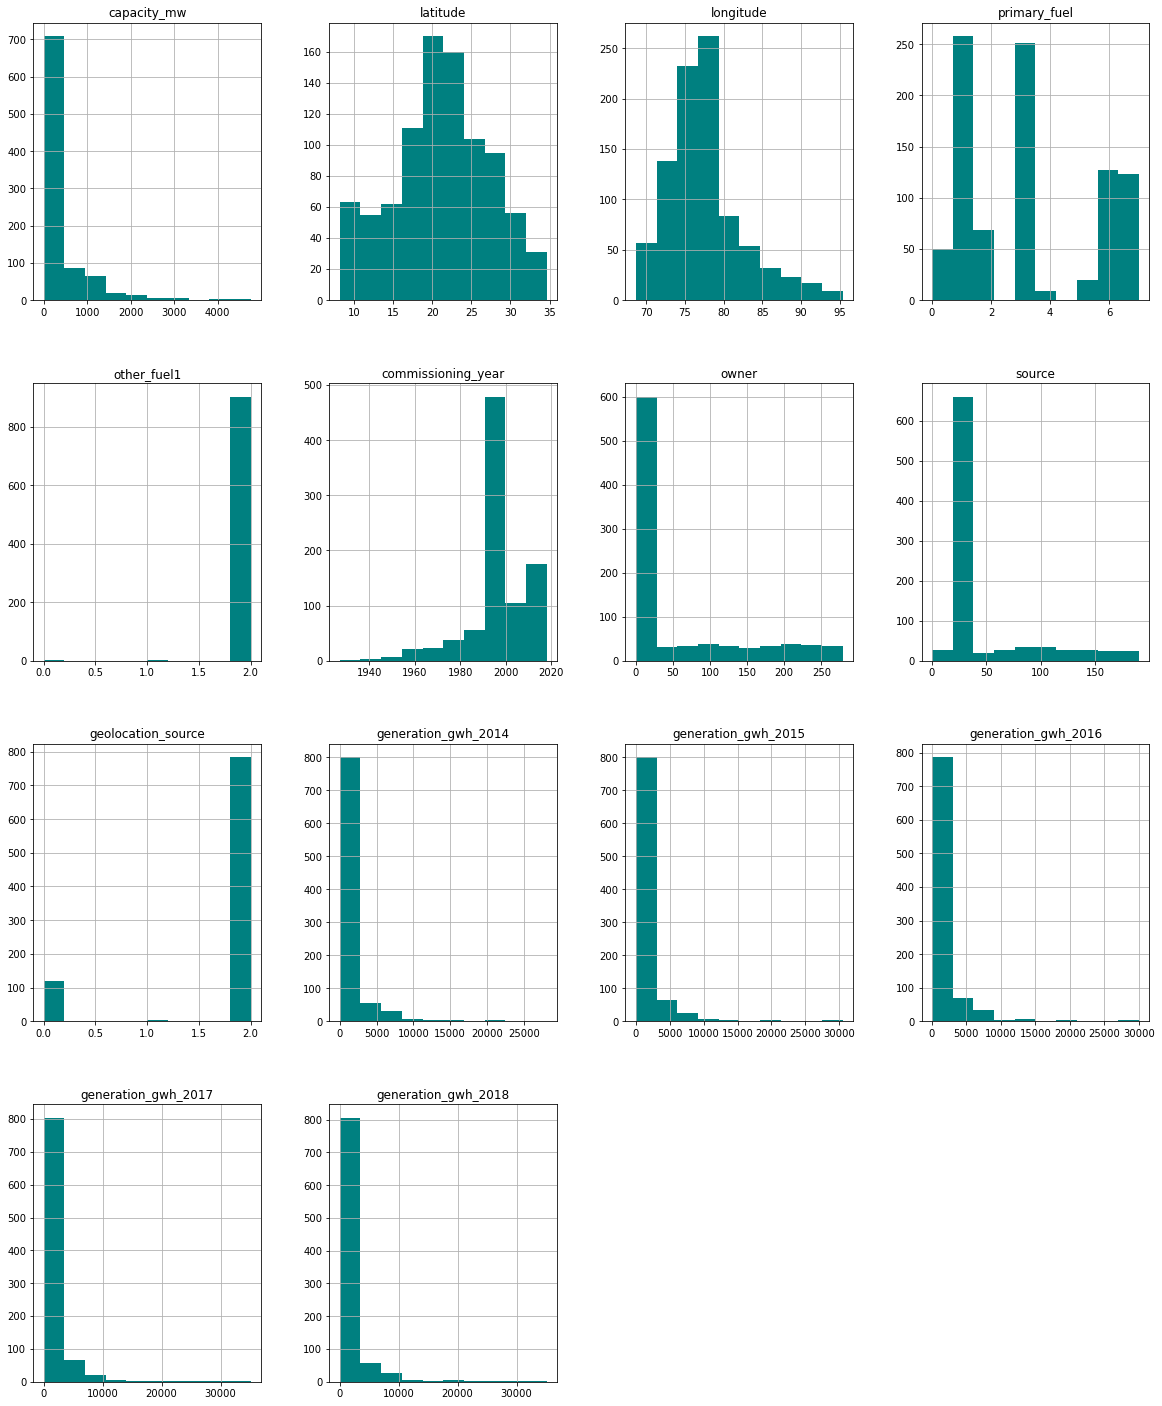

In [53]:
df.hist(figsize=(20,25), color= 'teal')
plt.show()

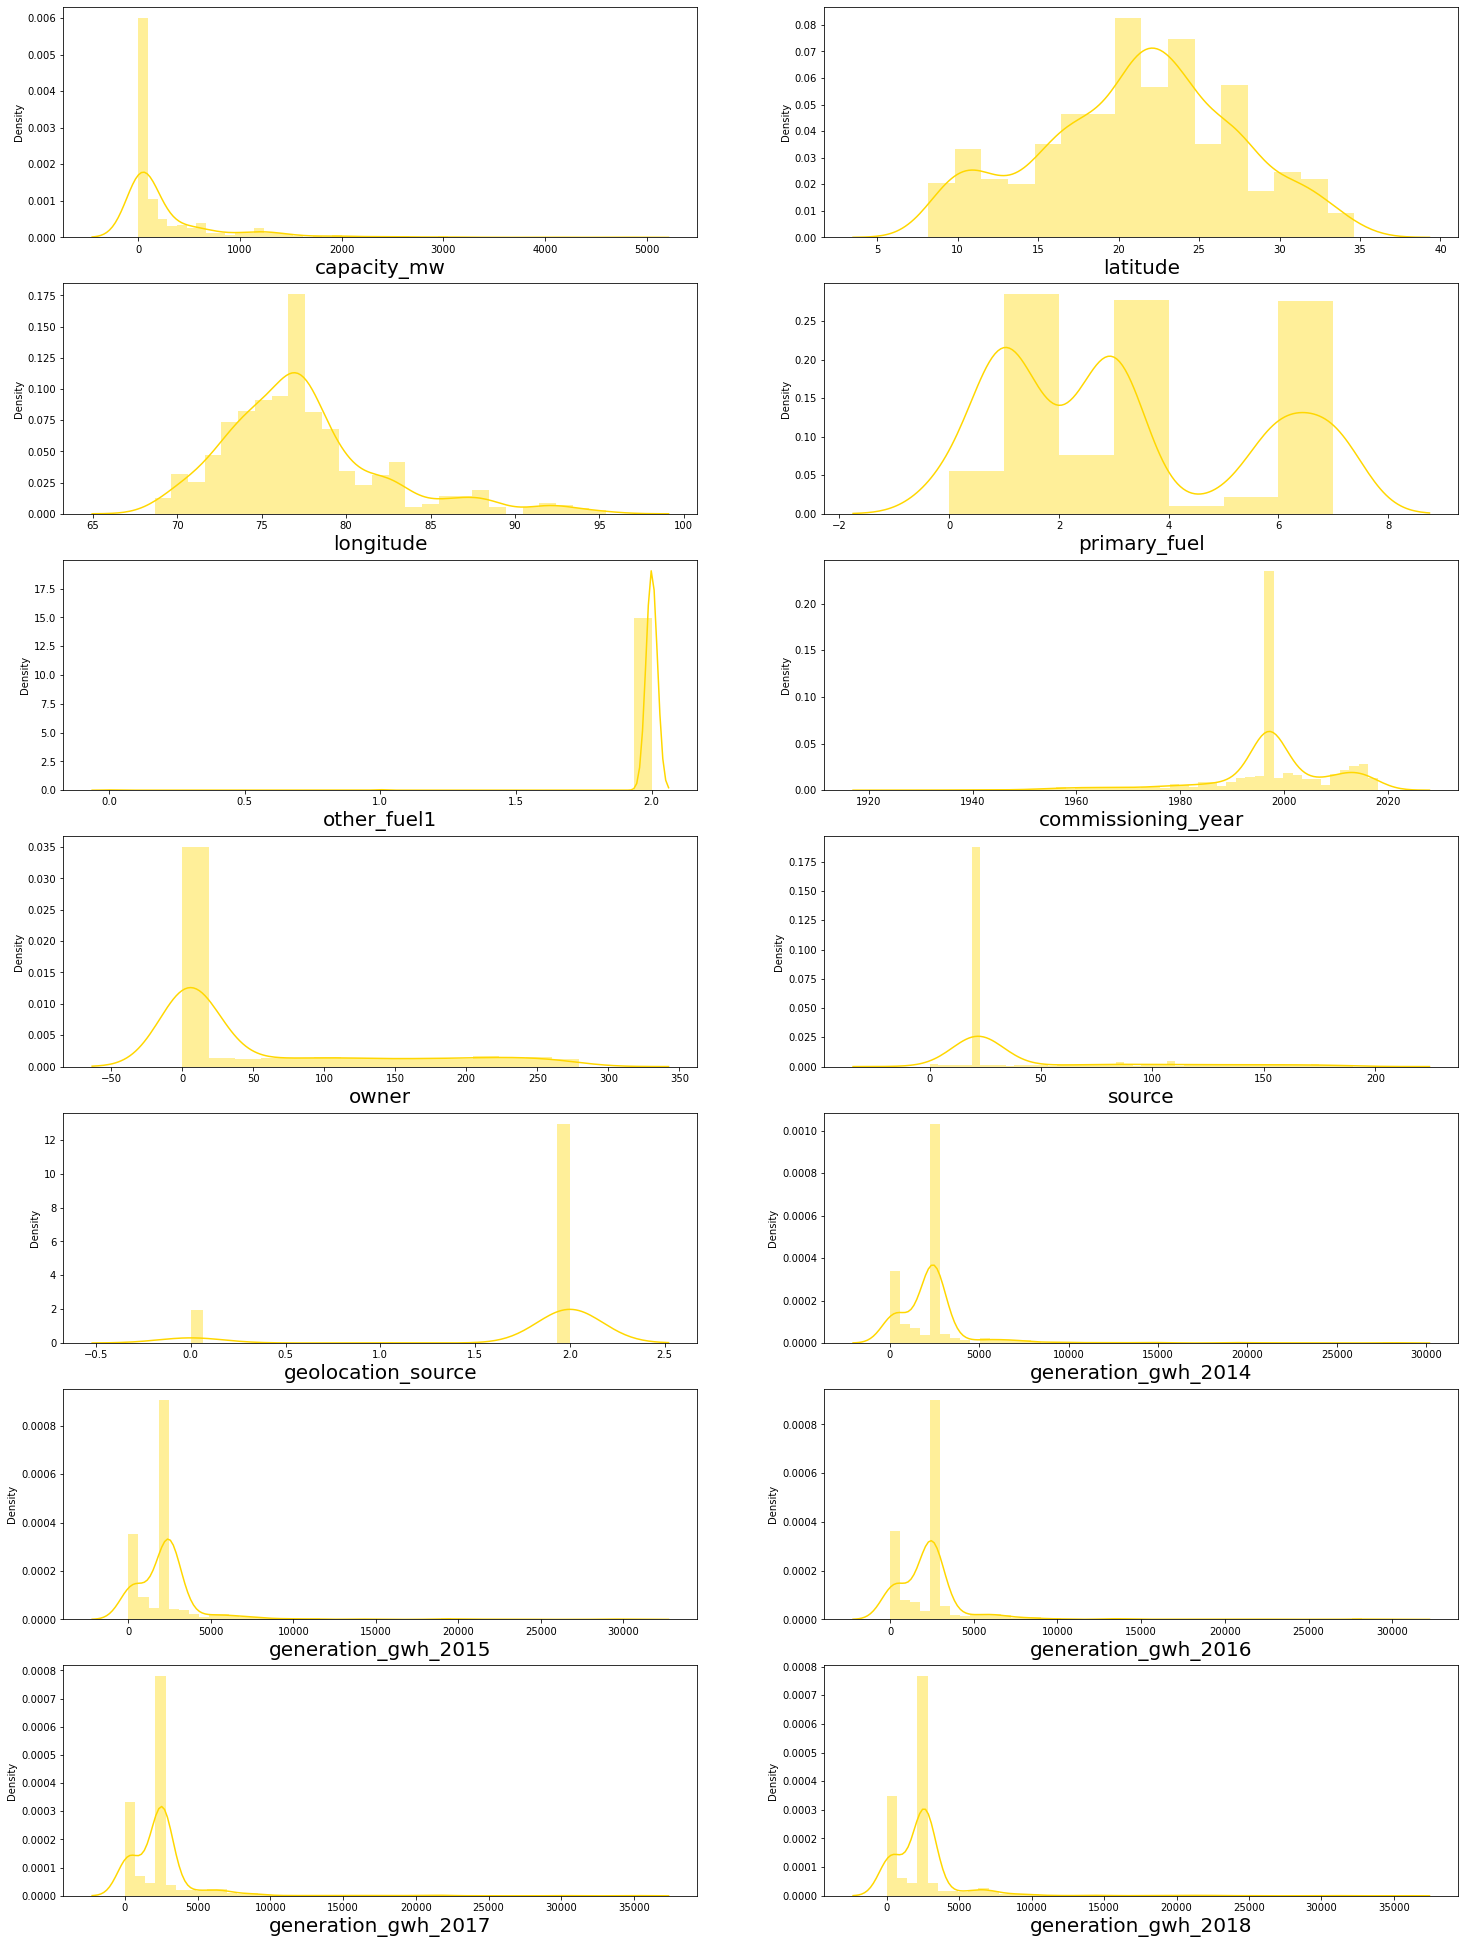

In [54]:
#Univariate Analysis

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'gold')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

In [55]:
# Here we can see that the 'Coal' energy source is used the highest in the generation of electricity. 
# Then the next energy source used is the 'HydroBiomass' and followed by the other energy sources.
# It can be observed that 'other_fuel1' type has 3 unique types namely: 'Oil', 'Cogeneration other fuel', 'Gas'. 
# And it is clearly seen that oil is the max used fuel type.
# Here it can be seen that the count of WRI is the max, which means that the max information is shared by this source.

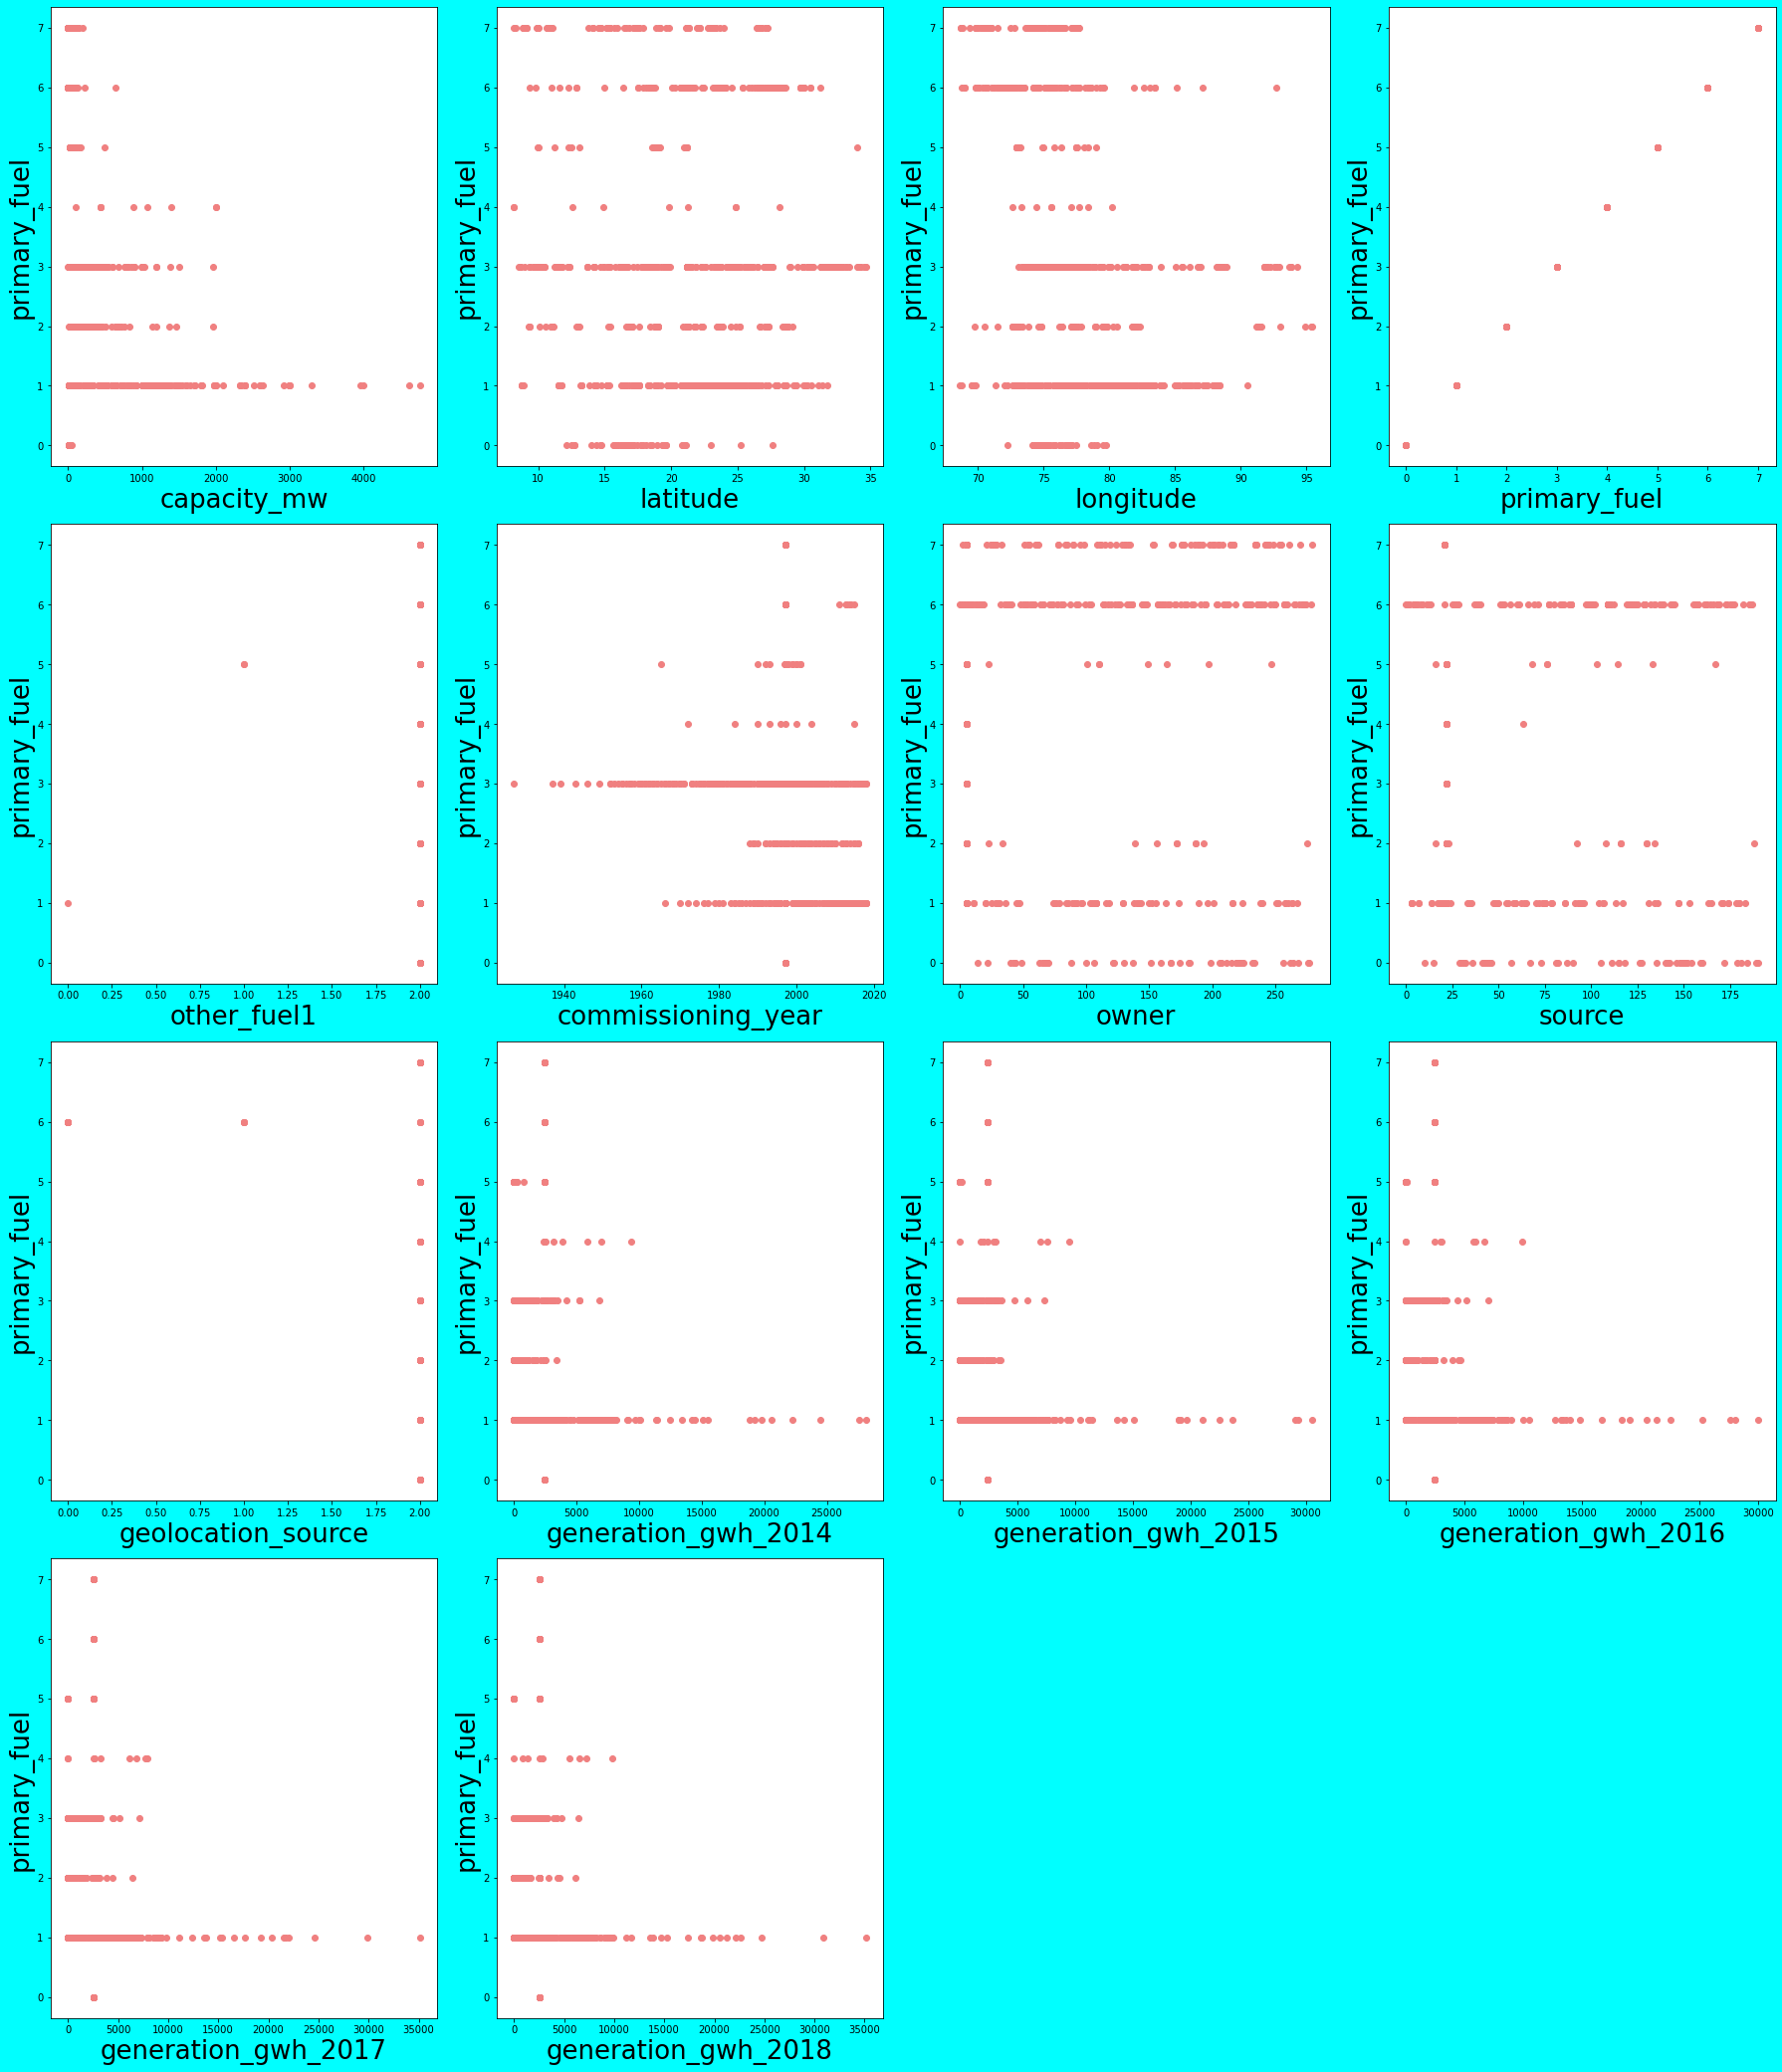

In [56]:
#Bivariate Analysis primary_fuel

plt.figure(figsize = (25,50), facecolor = 'cyan')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        ax = plt.subplot(7,4,plotnumber)
        plt.scatter(df[column],df['primary_fuel'], color='lightcoral')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('primary_fuel', fontsize=26)
    plotnumber += 1
plt.tight_layout()

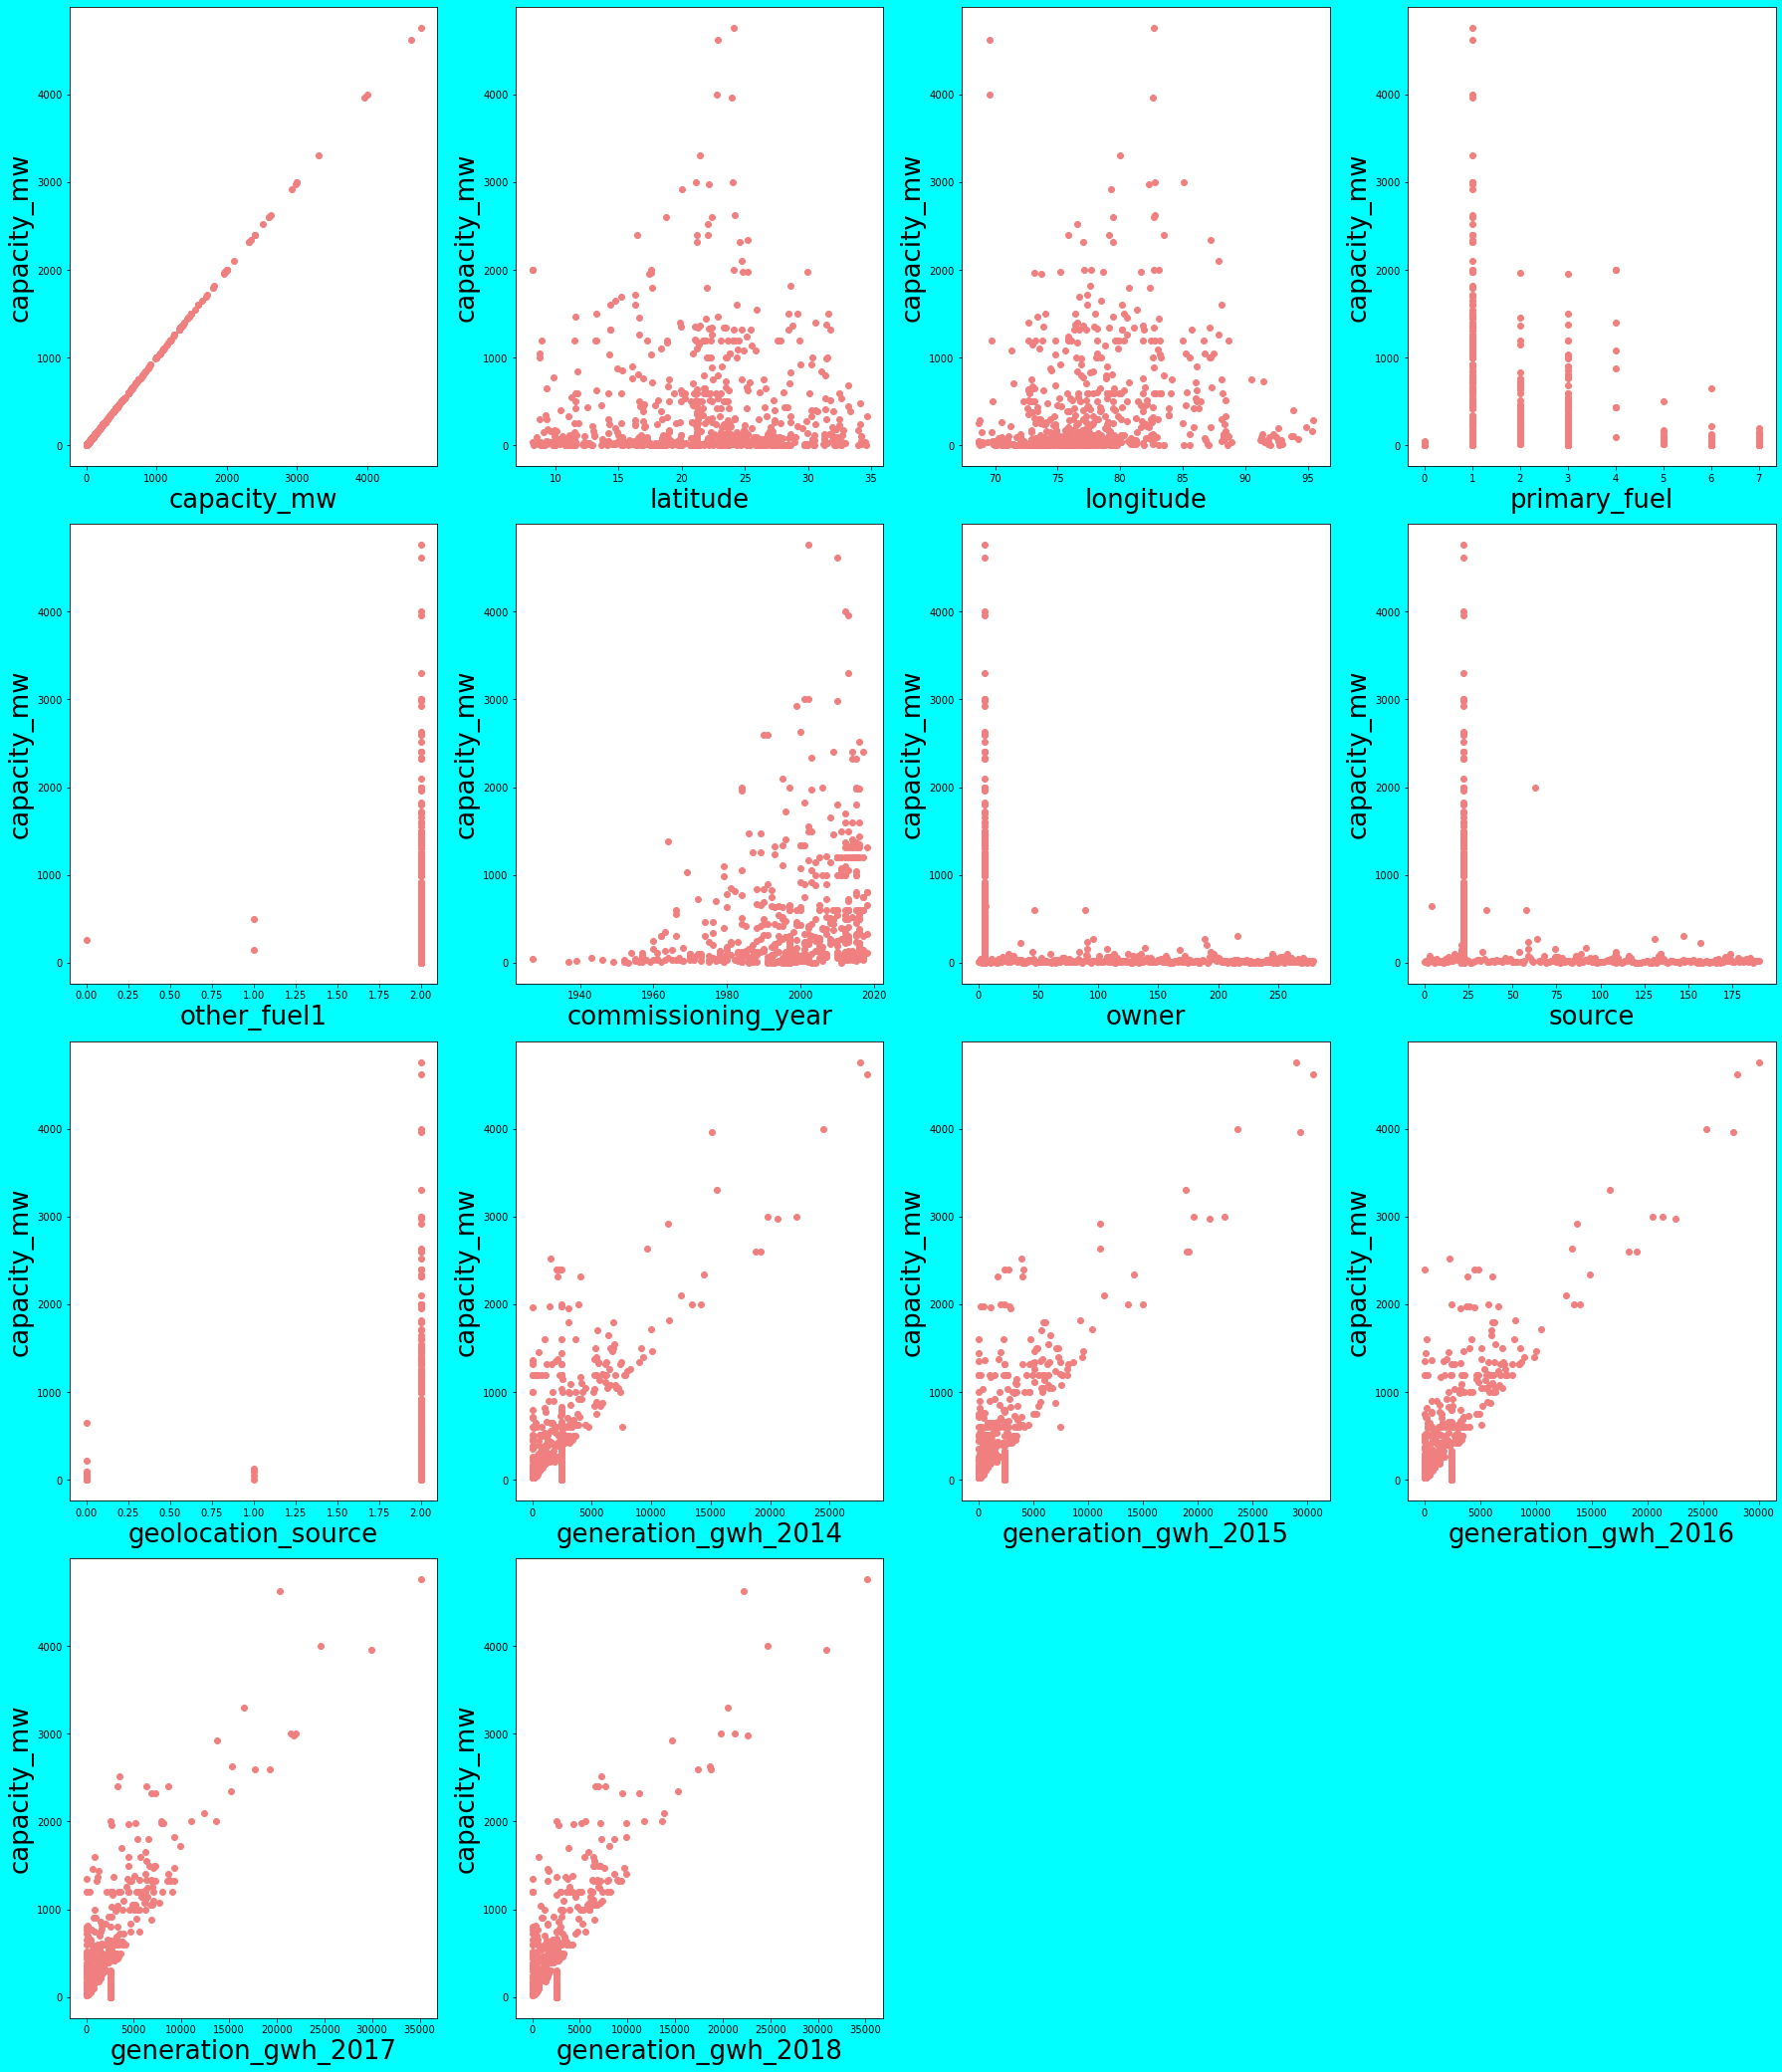

In [57]:
#Bivariate Analysis for capacity_mw

plt.figure(figsize = (25,50), facecolor = 'cyan')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        ax = plt.subplot(7,4,plotnumber)
        plt.scatter(df[column],df['capacity_mw'], color='lightcoral')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('capacity_mw', fontsize=26)
    plotnumber += 1
plt.tight_layout()

In [58]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,-0.380395,0.003105,0.274292,-3.110481e-01,-2.421218e-01,2.048653e-01,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01
latitude,0.050984,1.000000,0.036362,-0.010204,0.036695,0.102069,-7.118234e-02,5.592656e-02,-1.842751e-01,4.432124e-02,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02
longitude,0.195882,0.036362,1.000000,-0.347948,0.030311,0.092331,-3.012853e-01,-2.393334e-01,2.523426e-01,1.147221e-02,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,0.004912,-0.126650,2.842958e-01,5.361263e-02,-4.832168e-01,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01
other_fuel1,0.003105,0.036695,0.030311,0.004912,1.000000,0.036904,3.368729e-02,2.658990e-02,-2.140831e-02,2.450509e-02,2.679006e-02,3.157459e-02,2.111693e-02,3.567517e-02
commissioning_year,0.274292,0.102069,0.092331,-0.126650,0.036904,1.000000,1.507424e-02,2.152776e-02,-7.843657e-03,1.330505e-01,1.473376e-01,1.706440e-01,1.708631e-01,1.743766e-01
owner,-0.311048,-0.071182,-0.301285,0.284296,0.033687,0.015074,1.000000e+00,7.695825e-01,-3.848377e-01,1.211927e-18,-4.253175e-17,-8.115062e-18,-7.069909e-17,4.713271e-17
source,-0.242122,0.055927,-0.239333,0.053613,0.026590,0.021528,7.695825e-01,1.000000e+00,-5.057202e-01,1.917854e-18,-2.160931e-17,-4.925637e-17,-1.284552e-16,1.092118e-17
geolocation_source,0.204865,-0.184275,0.252343,-0.483217,-0.021408,-0.007844,-3.848377e-01,-5.057202e-01,1.000000e+00,-2.966463e-17,-6.339264e-18,2.904016e-17,8.066490e-17,-1.048582e-17
generation_gwh_2014,0.694350,0.044321,0.011472,-0.124769,0.024505,0.133051,1.211927e-18,1.917854e-18,-2.966463e-17,1.000000e+00,9.535943e-01,9.258738e-01,8.916868e-01,8.849556e-01


<AxesSubplot:>

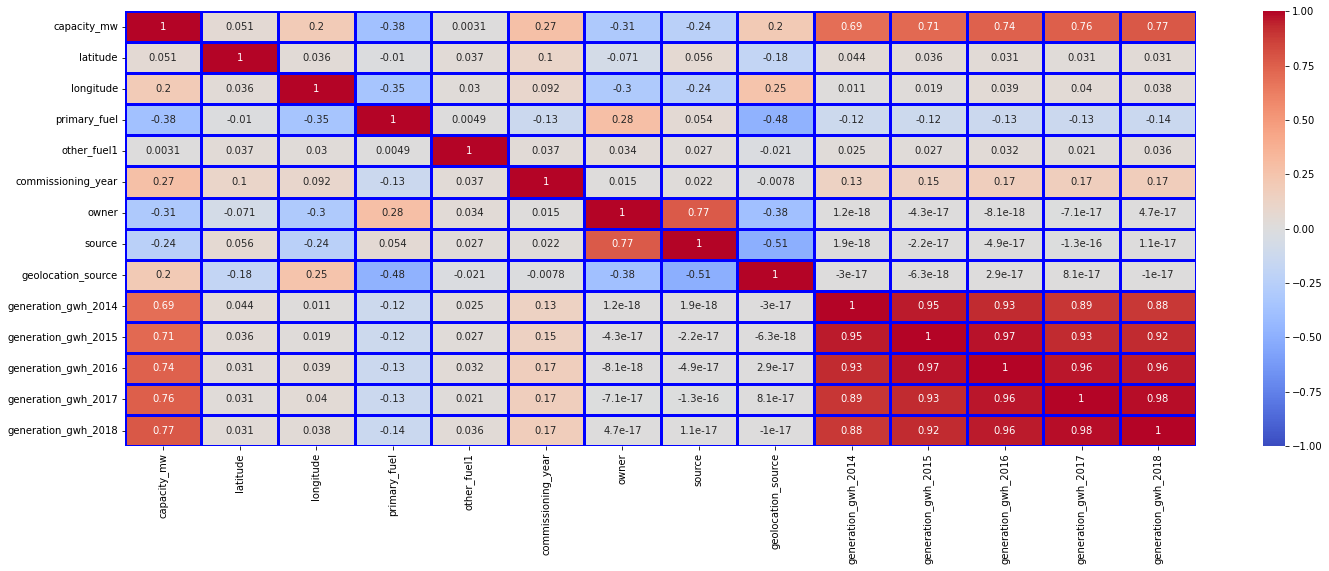

In [59]:
#let us make a heatmap

import matplotlib.pyplot as plt
plt.figure(figsize=(24,8))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='blue')

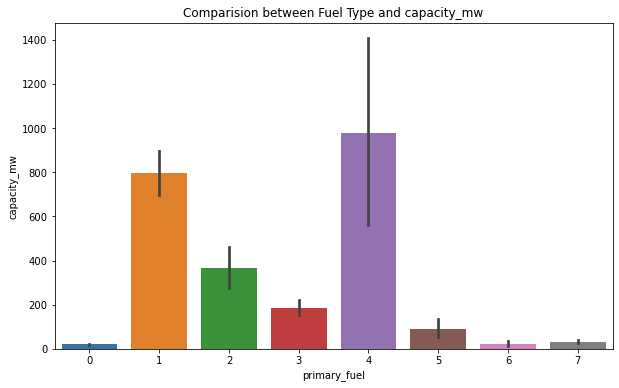

In [60]:
# Checking the relationship between both the targets

plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

In [61]:
# Here also it shows that energy source Nuclear has shown the major contribution

In [62]:
# let us now check for the skewness
df.skew()

capacity_mw             3.123576
latitude               -0.149698
longitude               1.141881
primary_fuel            0.472251
other_fuel1           -20.453120
commissioning_year     -1.399359
owner                   1.364406
source                  1.827373
geolocation_source     -2.159841
generation_gwh_2014     5.035446
generation_gwh_2015     5.364134
generation_gwh_2016     5.068427
generation_gwh_2017     5.110952
generation_gwh_2018     4.937907
dtype: float64

In [63]:
# skewness is present!

In [64]:
# let us work for the outliers

In [65]:
# Using Z Score to remove outliers

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold= 3
np.where(z>3)

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
        147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 222, 244,
        299, 308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 342, 345,
        360, 363, 364, 364, 364, 364, 364, 364, 371, 375, 416, 427, 444,
        454, 478, 482, 484, 493, 493, 493, 493, 493, 493, 494, 494, 494,
        494, 494, 494, 499, 519, 538, 541, 546, 573, 577, 583, 592, 601,
        621, 638, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657,
        657, 661, 669, 689, 695, 695, 695, 695, 695, 695, 706, 709, 721,
        721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726, 726,
        726, 728, 767, 786, 786, 786, 786, 786, 786, 788, 807, 808, 808,
        808, 808, 808, 808, 811, 813, 817, 818, 832, 847, 848, 870, 871,
        879, 880, 880, 880, 880, 880, 880, 895, 900], dtype=int64),
 array([ 0, 10, 11, 12, 13,  7,  7,  0,  9, 10, 11, 12, 13,  0,  9,  2,  2,
         7,  0,  9, 10, 11, 12, 13,  5,  2,  7,  0,  

In [66]:
df= df[(z<3).all(axis=1)]
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.000000,229,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,2,1997.091082,258,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,2,1997.091082,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2,2004.000000,5,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.000000,5,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.000000,5,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2,1997.091082,114,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,7,2,1997.091082,5,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1,2,1997.091082,91,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [67]:
# now again check the boxplot

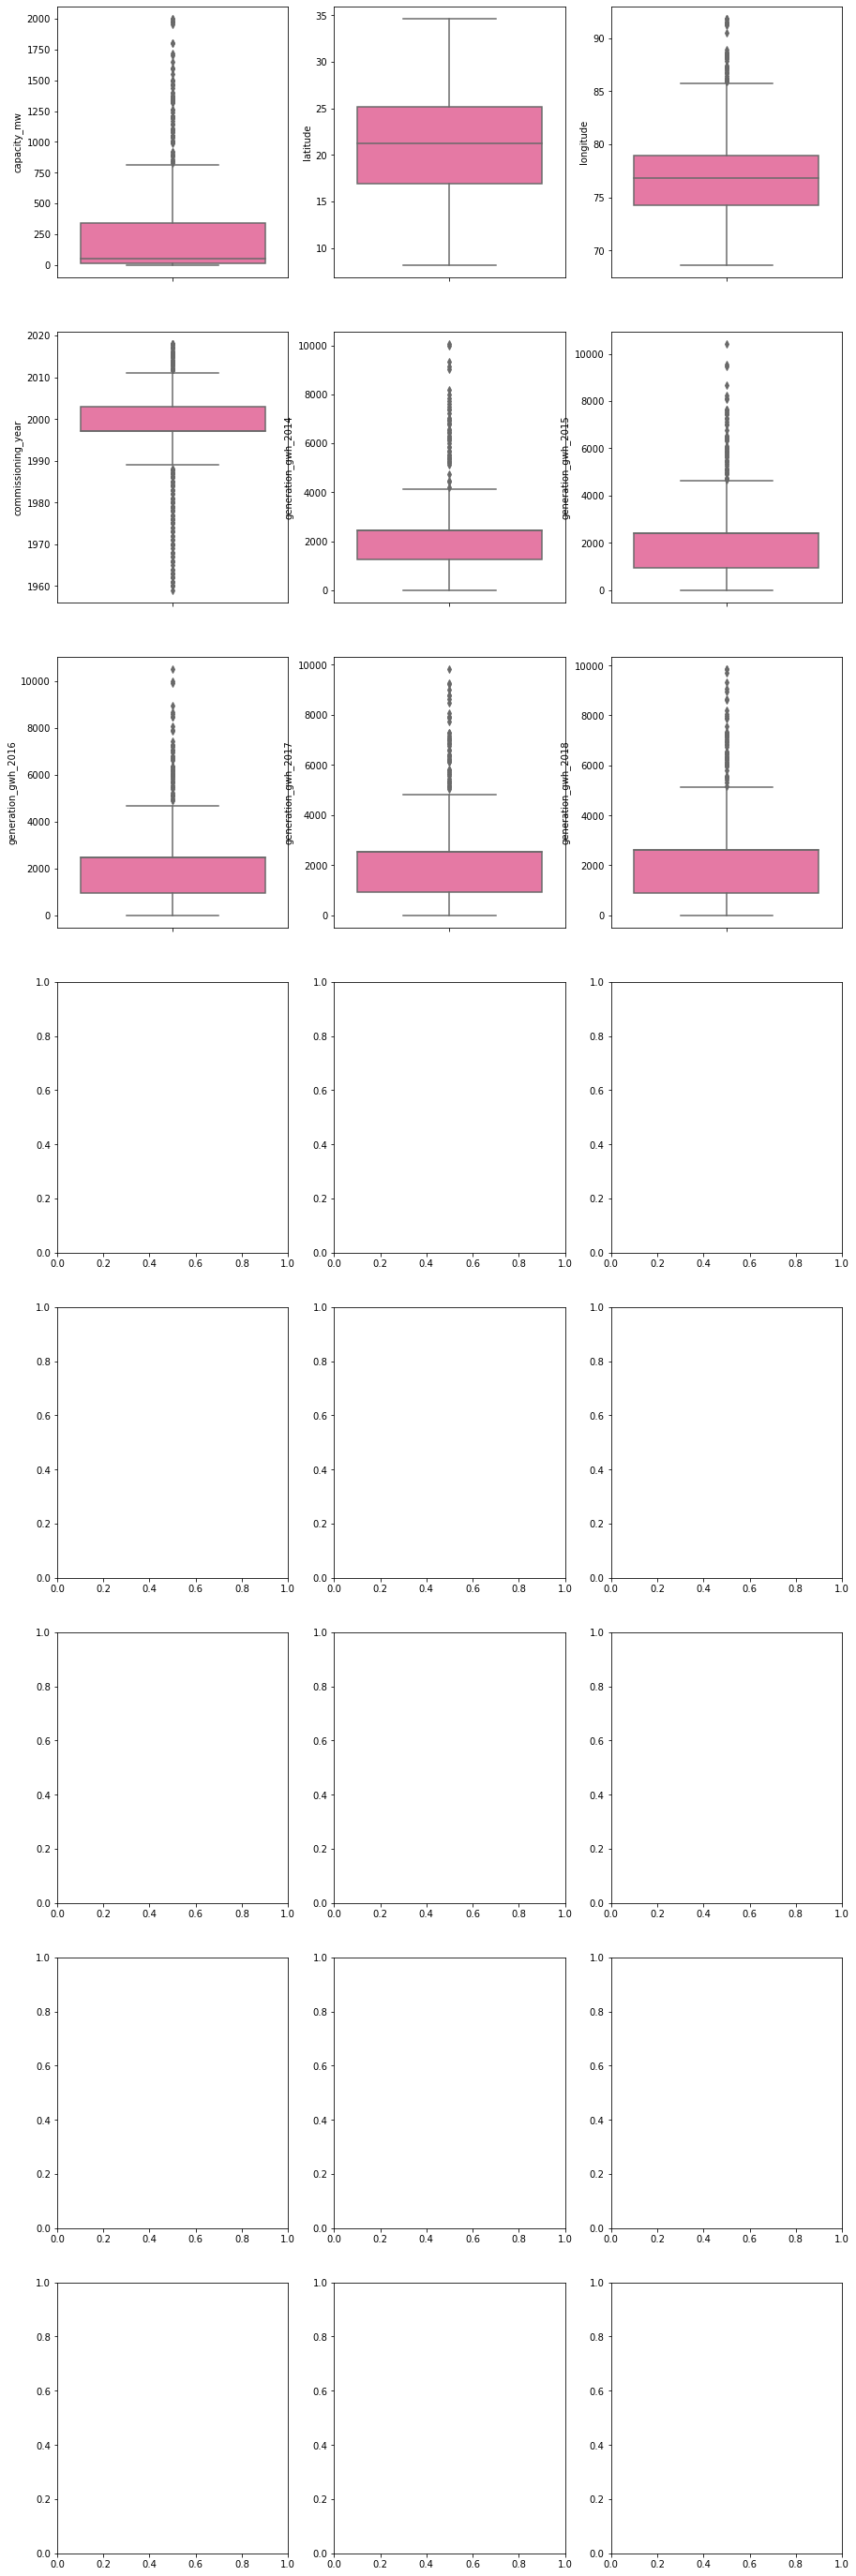

In [68]:
# Boxplot

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[float_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="RdPu")
    index += 1
plt.show()

In [69]:
df.shape

(831, 14)

In [70]:
df.skew()

capacity_mw            1.951101
latitude              -0.116001
longitude              0.907429
primary_fuel           0.414888
other_fuel1            0.000000
commissioning_year    -0.836352
owner                  1.316648
source                 1.778820
geolocation_source    -2.098153
generation_gwh_2014    1.524498
generation_gwh_2015    1.391829
generation_gwh_2016    1.413544
generation_gwh_2017    1.277944
generation_gwh_2018    1.316517
dtype: float64

In [71]:
# Many columns that have skewness more than +0.5 and -0.5

# These are:
# geolocation_source, commissioning_year, longitude, generation_gwh_2017, generation_gwh_2018, owner, generation_gwh_2015
# generation_gwh_2016, generation_gwh_2014, source, capacity_mw

In [72]:
df.skew().sort_values()

geolocation_source    -2.098153
commissioning_year    -0.836352
latitude              -0.116001
other_fuel1            0.000000
primary_fuel           0.414888
longitude              0.907429
generation_gwh_2017    1.277944
generation_gwh_2018    1.316517
owner                  1.316648
generation_gwh_2015    1.391829
generation_gwh_2016    1.413544
generation_gwh_2014    1.524498
source                 1.778820
capacity_mw            1.951101
dtype: float64

In [73]:
skew= ['geolocation_source', 'commissioning_year', 'longitude', 'generation_gwh_2017', 'generation_gwh_2018', 'owner', 
'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2014', 'source', 'capacity_mw']

In [74]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [75]:
pt = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [76]:
df[skew] = pt.fit_transform(df[skew].values)
df[skew]

,geolocation_source,commissioning_year,longitude,generation_gwh_2017,generation_gwh_2018,owner,generation_gwh_2015,generation_gwh_2016,generation_gwh_2014,source,capacity_mw
0,-2.275247,1.277259,-0.931599,0.363868,0.376212,1.474968,0.357812,0.360604,0.329035,1.611480,-1.670485
1,0.404765,-0.187895,-0.515784,0.363868,0.376212,1.499029,0.357812,0.360604,0.329035,2.085635,0.213881
2,0.404765,-0.187895,-2.351293,0.363868,0.376212,-1.851373,0.357812,0.360604,0.329035,-0.469448,-0.281267
3,0.404765,0.490910,2.444959,-0.891229,-0.917966,-0.740267,-0.723205,-0.676883,-1.034872,-0.401391,0.386112
4,0.404765,1.776406,1.245188,1.551454,2.105815,-0.740267,1.883016,1.920984,0.664250,-0.401391,1.745464
...,...,...,...,...,...,...,...,...,...,...,...
902,0.404765,1.907288,0.210110,-0.707987,-0.859782,-0.740267,-2.095683,-1.412757,0.329035,-0.401391,1.685118
903,-2.477001,-0.187895,0.399435,0.363868,0.376212,1.301406,0.357812,0.360604,0.329035,1.227423,-1.592636
904,0.404765,-0.187895,-0.243373,0.363868,0.376212,-0.740267,0.357812,0.360604,0.329035,-0.469448,-0.513405
905,0.404765,-0.187895,-0.772885,0.363868,0.376212,1.231179,0.357812,0.360604,0.329035,0.913867,0.104443


In [77]:
df.skew()

capacity_mw            0.012680
latitude              -0.116001
longitude             -0.000610
primary_fuel           0.414888
other_fuel1            0.000000
commissioning_year     0.027757
owner                  0.435937
source                -0.176935
geolocation_source    -2.070053
generation_gwh_2014   -0.243889
generation_gwh_2015   -0.304667
generation_gwh_2016   -0.301926
generation_gwh_2017   -0.339000
generation_gwh_2018   -0.347562
dtype: float64

In [78]:
# skewness has been reduced to some extend!

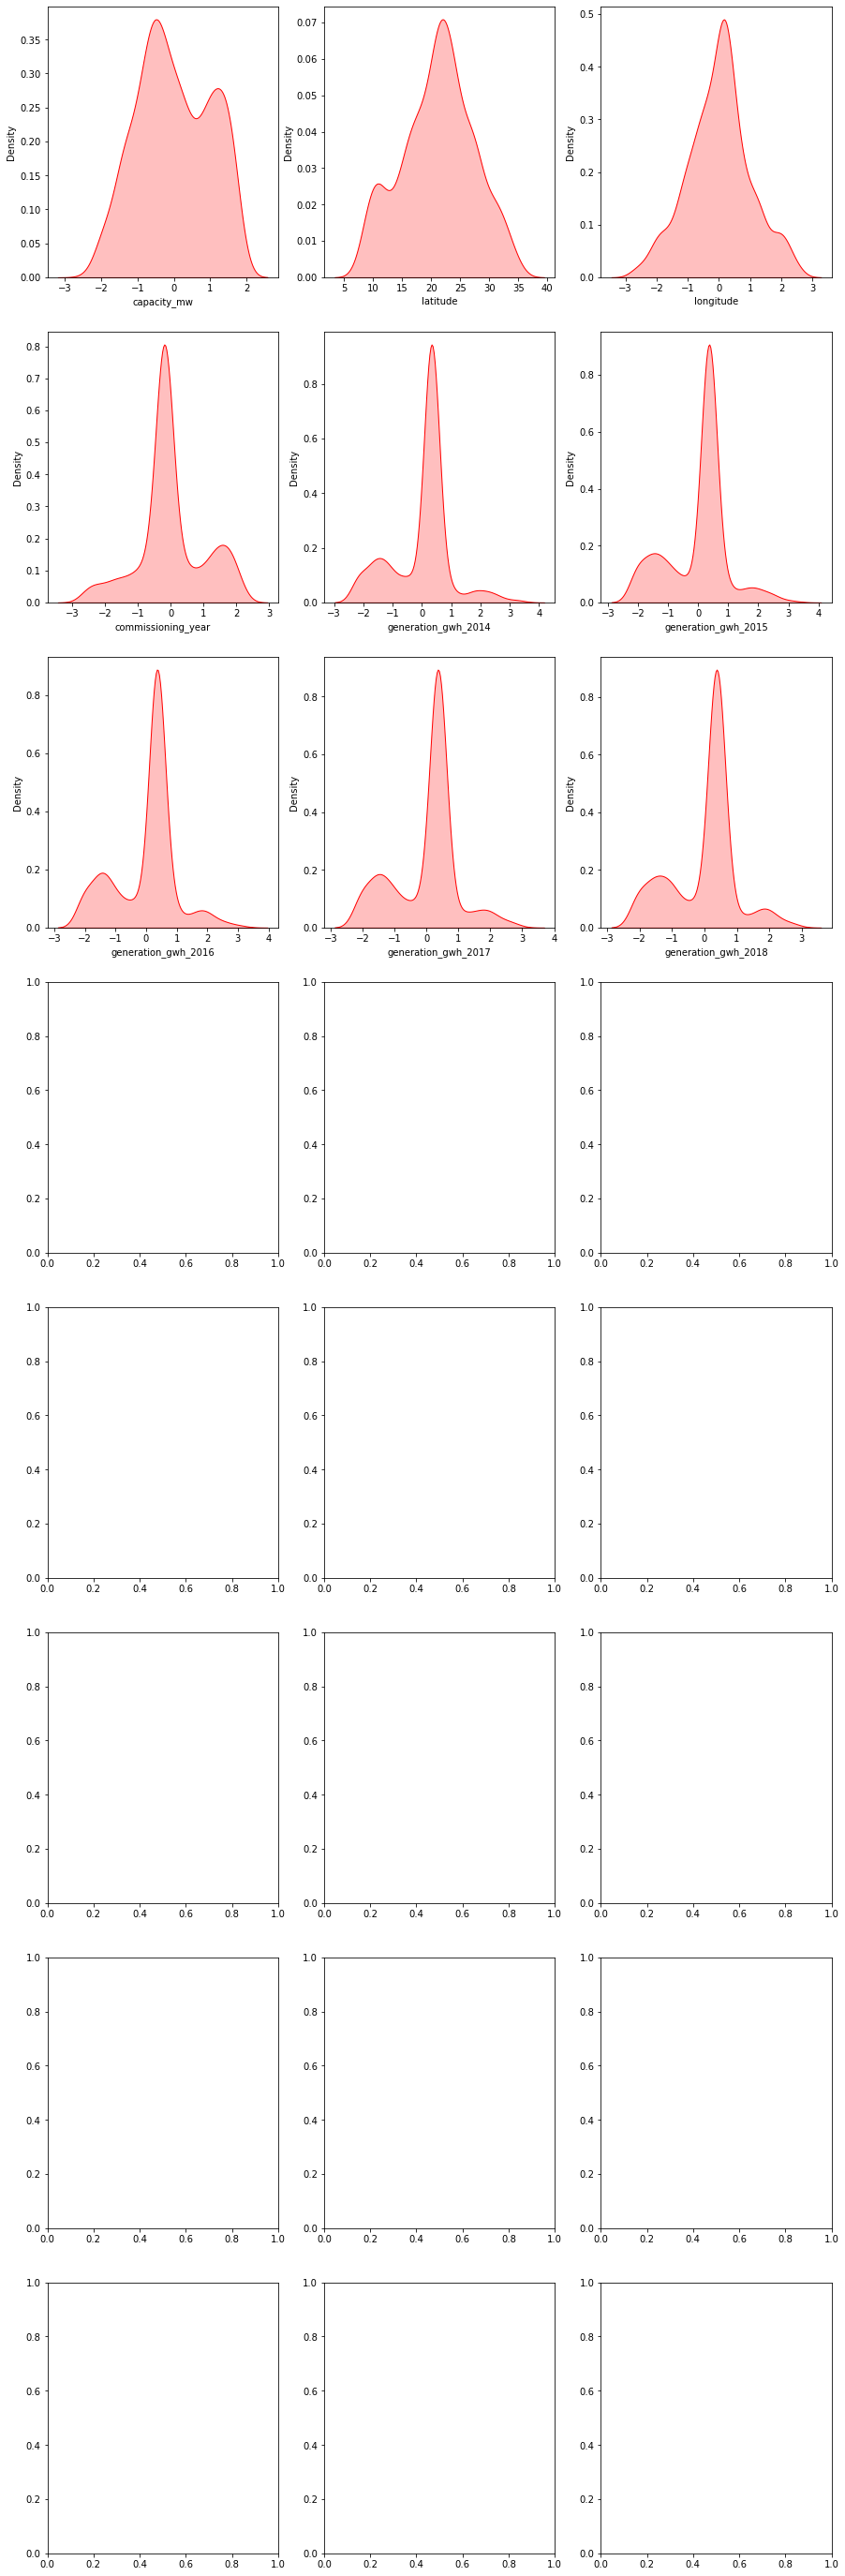

In [79]:
# visualize the skewness

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[float_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.show()

In [80]:
# Following more normal distribution than before!

In [81]:
# Handle missing values

In [82]:
for i in df.columns:
    print( i ,'have unique values = ',df[i].unique(),'\n')

capacity_mw have unique values =  [-1.67048521e+00  2.13880864e-01 -2.81267411e-01  3.86112177e-01
  1.74546417e+00  7.15262327e-01 -5.09977138e-02  5.74644465e-01
  7.94054531e-01  6.22449895e-01  1.59781357e+00  3.82122233e-01
  1.53711310e+00 -7.32254989e-01 -1.06429256e+00  9.88932858e-01
  1.17698682e+00 -1.00991757e+00 -7.30685914e-01 -5.46026300e-01
  1.22042917e+00 -1.94733285e-01 -1.49620315e-01 -1.99912790e+00
 -7.46580841e-01  2.93392100e-01 -6.49256408e-01 -8.64776534e-01
 -1.35758506e+00  1.26121414e+00 -4.63013268e-01  1.02608551e+00
  5.40173208e-01  1.46812200e+00  1.09184042e+00  1.26770928e-02
  8.12023476e-01  8.70436951e-01 -9.14874655e-01  8.37865022e-01
 -4.25796247e-01 -6.43875529e-01 -2.43949540e-01  1.27219040e+00
  1.67984666e-01  1.58624315e+00  3.22858478e-01  5.31148413e-04
  7.56144050e-01 -5.73596159e-01 -5.19775781e-01 -7.00205779e-01
  1.71619693e+00 -5.02948772e-01 -2.56984787e-01  1.60875160e+00
 -7.97205569e-01 -3.58204698e-01 -7.62946381e-01  1.0814

In [83]:
# there is no missing values there in the data set

In [84]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.670485,28.1839,-0.931599,6,2,1.277259,1.474968,1.611480,-2.275247,0.329035,0.357812,0.360604,0.363868,0.376212
1,0.213881,24.7663,-0.515784,1,2,-0.187895,1.499029,2.085635,0.404765,0.329035,0.357812,0.360604,0.363868,0.376212
2,-0.281267,21.9038,-2.351293,7,2,-0.187895,-1.851373,-0.469448,0.404765,0.329035,0.357812,0.360604,0.363868,0.376212
3,0.386112,23.8712,2.444959,2,2,0.490910,-0.740267,-0.401391,0.404765,-1.034872,-0.723205,-0.676883,-0.891229,-0.917966
4,1.745464,21.9603,1.245188,1,2,1.776406,-0.740267,-0.401391,0.404765,0.664250,1.883016,1.920984,1.551454,2.105815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1.685118,16.2949,0.210110,1,2,1.907288,-0.740267,-0.401391,0.404765,0.329035,-2.095683,-1.412757,-0.707987,-0.859782
903,-1.592636,12.8932,0.399435,6,2,-0.187895,1.301406,1.227423,-2.477001,0.329035,0.357812,0.360604,0.363868,0.376212
904,-0.513405,15.2758,-0.243373,7,2,-0.187895,-0.740267,-0.469448,0.404765,0.329035,0.357812,0.360604,0.363868,0.376212
905,0.104443,24.3500,-0.772885,1,2,-0.187895,1.231179,0.913867,0.404765,0.329035,0.357812,0.360604,0.363868,0.376212


# Prediction 

1. Primary Fuel

In [85]:
# Train-Test split

X = df.drop('primary_fuel', axis=1)
y = df['primary_fuel']

In [86]:
X

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.670485,28.1839,-0.931599,2,1.277259,1.474968,1.611480,-2.275247,0.329035,0.357812,0.360604,0.363868,0.376212
1,0.213881,24.7663,-0.515784,2,-0.187895,1.499029,2.085635,0.404765,0.329035,0.357812,0.360604,0.363868,0.376212
2,-0.281267,21.9038,-2.351293,2,-0.187895,-1.851373,-0.469448,0.404765,0.329035,0.357812,0.360604,0.363868,0.376212
3,0.386112,23.8712,2.444959,2,0.490910,-0.740267,-0.401391,0.404765,-1.034872,-0.723205,-0.676883,-0.891229,-0.917966
4,1.745464,21.9603,1.245188,2,1.776406,-0.740267,-0.401391,0.404765,0.664250,1.883016,1.920984,1.551454,2.105815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1.685118,16.2949,0.210110,2,1.907288,-0.740267,-0.401391,0.404765,0.329035,-2.095683,-1.412757,-0.707987,-0.859782
903,-1.592636,12.8932,0.399435,2,-0.187895,1.301406,1.227423,-2.477001,0.329035,0.357812,0.360604,0.363868,0.376212
904,-0.513405,15.2758,-0.243373,2,-0.187895,-0.740267,-0.469448,0.404765,0.329035,0.357812,0.360604,0.363868,0.376212
905,0.104443,24.3500,-0.772885,2,-0.187895,1.231179,0.913867,0.404765,0.329035,0.357812,0.360604,0.363868,0.376212


In [87]:
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 831, dtype: int32

In [88]:
# check class imbalance

In [89]:
y.value_counts()

1    230
3    221
7    123
6    121
2     64
0     45
5     18
4      9
Name: primary_fuel, dtype: int64

In [90]:
# This indicates class imbalance that needed to be fixed by using the oversampling method

In [91]:
# Synthetic Minority Over-sampling Technique (SMOTE)

In [92]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [93]:
y.value_counts()

6    230
1    230
7    230
2    230
3    230
0    230
5    230
4    230
Name: primary_fuel, dtype: int64

In [94]:
# class imbalance problem is solved!

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.775564,1.428872,-0.863776,0.0,1.727622,1.326547,1.437141,-2.476299,0.255898,0.308374,0.344919,0.338034,0.360706
1,0.199300,0.846257,-0.389241,0.0,-0.157988,1.350281,1.909541,0.373138,0.255898,0.308374,0.344919,0.338034,0.360706
2,-0.319628,0.358273,-2.483958,0.0,-0.157988,-1.954526,-0.636085,0.373138,0.255898,0.308374,0.344919,0.338034,0.360706
3,0.379802,0.693665,2.989615,0.0,0.715614,-0.858541,-0.568280,0.373138,-1.062801,-0.753184,-0.640901,-0.931628,-0.897122
4,1.804438,0.367904,1.620414,0.0,2.370009,-0.858541,-0.568280,0.373138,0.580002,1.806124,1.827594,1.539402,2.041729
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,-1.520122,0.237937,0.468725,0.0,-0.157988,1.330953,-0.636085,0.373138,0.255898,0.308374,0.344919,0.338034,0.360706
1836,-1.280187,-0.481140,-0.591230,0.0,-0.157988,0.960483,-0.636085,0.373138,0.255898,0.308374,0.344919,0.338034,0.360706
1837,-0.996896,-1.523569,0.397016,0.0,-0.157988,1.060207,-0.636085,0.373138,0.255898,0.308374,0.344919,0.338034,0.360706
1838,-1.024775,-0.479101,-0.537543,0.0,-0.157988,1.023584,-0.636085,0.373138,0.255898,0.308374,0.344919,0.338034,0.360706


In [96]:
# modelling and train and test split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

lr= LogisticRegression()
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()
svc= SVC()
knc= KNeighborsClassifier()
gb= GradientBoostingClassifier()

In [97]:
# LogisticRegression

In [98]:
#best random state for logistic regression.
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    lr= LogisticRegression()
    lr.fit(X_train, y_train)
    prediction= lr.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.7744565217391305 random_state 1
max_accuracy 0.7744565217391305 max_random_state 1
accuracy 0.7445652173913043 random_state 2
accuracy 0.720108695652174 random_state 3
accuracy 0.7228260869565217 random_state 4
accuracy 0.7690217391304348 random_state 5
accuracy 0.7038043478260869 random_state 6
accuracy 0.779891304347826 random_state 7
max_accuracy 0.779891304347826 max_random_state 7
accuracy 0.7581521739130435 random_state 8
accuracy 0.7282608695652174 random_state 9
accuracy 0.7717391304347826 random_state 10
accuracy 0.7608695652173914 random_state 11
accuracy 0.7472826086956522 random_state 12
accuracy 0.7554347826086957 random_state 13
accuracy 0.7309782608695652 random_state 14
accuracy 0.7472826086956522 random_state 15
accuracy 0.7010869565217391 random_state 16
accuracy 0.75 random_state 17
accuracy 0.7309782608695652 random_state 18
accuracy 0.7608695652173914 random_state 19
accuracy 0.7771739130434783 random_state 20
accuracy 0.7717391304347826 random_state 21


In [99]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8043478260869565 on random_state 135


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 135)

# Training the model
lr.fit(X_train, y_train)
    
# Predicting Y_test
pred = lr.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(lr, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 77.17391304347827

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        47
           1       0.53      0.64      0.58        33
           2       0.87      0.65      0.74        51
           3       0.50      0.50      0.50        42
           4       0.78      0.90      0.83        50
           5       0.88      0.75      0.81        51
           6       1.00      0.98      0.99        46
           7       0.68      0.79      0.73        48

    accuracy                           0.77       368
   macro avg       0.77      0.76      0.76       368
weighted avg       0.79      0.77      0.77       368

Cross Validation Score: 74.6195652173913

Accuracy Score - Cross Validation Score is 2.5543478260869676


In [101]:
# DecisionTreeClassifier

In [102]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    dt= DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    prediction= dt.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.8913043478260869 random_state 1
max_accuracy 0.8913043478260869 max_random_state 1
accuracy 0.8777173913043478 random_state 2
accuracy 0.8804347826086957 random_state 3
accuracy 0.8478260869565217 random_state 4
accuracy 0.875 random_state 5
accuracy 0.8668478260869565 random_state 6
accuracy 0.8722826086956522 random_state 7
accuracy 0.8913043478260869 random_state 8
accuracy 0.8559782608695652 random_state 9
accuracy 0.8994565217391305 random_state 10
max_accuracy 0.8994565217391305 max_random_state 10
accuracy 0.8804347826086957 random_state 11
accuracy 0.9293478260869565 random_state 12
max_accuracy 0.9293478260869565 max_random_state 12
accuracy 0.9130434782608695 random_state 13
accuracy 0.8777173913043478 random_state 14
accuracy 0.8804347826086957 random_state 15
accuracy 0.8777173913043478 random_state 16
accuracy 0.8777173913043478 random_state 17
accuracy 0.8722826086956522 random_state 18
accuracy 0.8777173913043478 random_state 19
accuracy 0.8641304347826086 ran

In [103]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.9347826086956522 on random_state 35


In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 35)

# Training the model
dt.fit(X_train, y_train)
    
# Predicting Y_test
pred = dt.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(dt, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 87.77173913043478

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.64      0.71      0.67        41
           2       0.73      0.82      0.78        40
           3       0.86      0.73      0.79        49
           4       0.90      0.91      0.90        57
           5       0.93      0.89      0.91        46
           6       1.00      1.00      1.00        46
           7       1.00      1.00      1.00        55

    accuracy                           0.88       368
   macro avg       0.88      0.87      0.87       368
weighted avg       0.88      0.88      0.88       368

Cross Validation Score: 89.13043478260869

Accuracy Score - Cross Validation Score is 1.3586956521739069


In [105]:
# RandomForestClassifier

In [106]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    rf= RandomForestClassifier()
    rf.fit(X_train, y_train)
    prediction= rf.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.9402173913043478 random_state 1
max_accuracy 0.9402173913043478 max_random_state 1
accuracy 0.907608695652174 random_state 2
accuracy 0.9130434782608695 random_state 3
accuracy 0.8994565217391305 random_state 4
accuracy 0.9239130434782609 random_state 5
accuracy 0.9021739130434783 random_state 6
accuracy 0.904891304347826 random_state 7
accuracy 0.9103260869565217 random_state 8
accuracy 0.904891304347826 random_state 9
accuracy 0.9320652173913043 random_state 10
accuracy 0.9184782608695652 random_state 11
accuracy 0.9375 random_state 12
accuracy 0.9402173913043478 random_state 13
accuracy 0.9266304347826086 random_state 14
accuracy 0.9184782608695652 random_state 15
accuracy 0.9130434782608695 random_state 16
accuracy 0.9184782608695652 random_state 17
accuracy 0.9293478260869565 random_state 18
accuracy 0.9320652173913043 random_state 19
accuracy 0.9211956521739131 random_state 20
accuracy 0.9184782608695652 random_state 21
accuracy 0.9375 random_state 22
accuracy 0.940217

In [107]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.9565217391304348 on random_state 92


In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 92)

# Training the model
rf.fit(X_train, y_train)
    
# Predicting Y_test
pred = rf.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(rf, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 96.46739130434783

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       0.94      0.89      0.91        35
           2       0.97      0.90      0.93        63
           3       0.91      0.94      0.93        34
           4       1.00      1.00      1.00        45
           5       0.91      0.98      0.94        50
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00        45

    accuracy                           0.96       368
   macro avg       0.96      0.96      0.96       368
weighted avg       0.97      0.96      0.96       368

Cross Validation Score: 92.3913043478261

Accuracy Score - Cross Validation Score is 4.076086956521735


In [109]:
# SVC

In [110]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    svc= RandomForestClassifier()
    svc.fit(X_train, y_train)
    prediction= svc.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.9402173913043478 random_state 1
max_accuracy 0.9402173913043478 max_random_state 1
accuracy 0.9021739130434783 random_state 2
accuracy 0.9130434782608695 random_state 3
accuracy 0.9021739130434783 random_state 4
accuracy 0.9293478260869565 random_state 5
accuracy 0.907608695652174 random_state 6
accuracy 0.904891304347826 random_state 7
accuracy 0.9184782608695652 random_state 8
accuracy 0.904891304347826 random_state 9
accuracy 0.9402173913043478 random_state 10
accuracy 0.9211956521739131 random_state 11
accuracy 0.9375 random_state 12
accuracy 0.9456521739130435 random_state 13
max_accuracy 0.9456521739130435 max_random_state 13
accuracy 0.9293478260869565 random_state 14
accuracy 0.9157608695652174 random_state 15
accuracy 0.9293478260869565 random_state 16
accuracy 0.9157608695652174 random_state 17
accuracy 0.9320652173913043 random_state 18
accuracy 0.9375 random_state 19
accuracy 0.9293478260869565 random_state 20
accuracy 0.9266304347826086 random_state 21
accuracy 

In [111]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.9538043478260869 on random_state 92


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 92)

# Training the model
svc.fit(X_train, y_train)
    
# Predicting Y_test
pred = svc.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 95.65217391304348

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       0.91      0.89      0.90        35
           2       0.96      0.86      0.91        63
           3       0.86      0.94      0.90        34
           4       1.00      1.00      1.00        45
           5       0.91      0.98      0.94        50
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00        45

    accuracy                           0.96       368
   macro avg       0.95      0.96      0.95       368
weighted avg       0.96      0.96      0.96       368

Cross Validation Score: 92.5

Accuracy Score - Cross Validation Score is 3.152173913043484


In [113]:
# KNeighborsClassifier

In [114]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    knc= KNeighborsClassifier()
    knc.fit(X_train, y_train)
    prediction= knc.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.8858695652173914 random_state 1
max_accuracy 0.8858695652173914 max_random_state 1
accuracy 0.842391304347826 random_state 2
accuracy 0.8641304347826086 random_state 3
accuracy 0.8586956521739131 random_state 4
accuracy 0.8831521739130435 random_state 5
accuracy 0.845108695652174 random_state 6
accuracy 0.875 random_state 7
accuracy 0.8614130434782609 random_state 8
accuracy 0.8559782608695652 random_state 9
accuracy 0.8858695652173914 random_state 10
accuracy 0.8614130434782609 random_state 11
accuracy 0.8994565217391305 random_state 12
max_accuracy 0.8994565217391305 max_random_state 12
accuracy 0.907608695652174 random_state 13
max_accuracy 0.907608695652174 max_random_state 13
accuracy 0.8858695652173914 random_state 14
accuracy 0.8804347826086957 random_state 15
accuracy 0.8777173913043478 random_state 16
accuracy 0.8722826086956522 random_state 17
accuracy 0.8967391304347826 random_state 18
accuracy 0.8858695652173914 random_state 19
accuracy 0.8777173913043478 random_

In [115]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.9184782608695652 on random_state 118


In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 118)

# Training the model
knc.fit(X_train, y_train)
    
# Predicting Y_test
pred = knc.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 91.03260869565217

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        48
           1       0.75      0.77      0.76        35
           2       0.89      0.78      0.83        63
           3       0.93      0.76      0.84        34
           4       0.96      1.00      0.98        45
           5       0.83      1.00      0.91        50
           6       1.00      1.00      1.00        48
           7       0.98      0.96      0.97        45

    accuracy                           0.91       368
   macro avg       0.91      0.91      0.91       368
weighted avg       0.91      0.91      0.91       368

Cross Validation Score: 92.28260869565217

Accuracy Score - Cross Validation Score is 1.25


In [117]:
# GradientBoostingClassifier

In [118]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    gb= GradientBoostingClassifier()
    gb.fit(X_train, y_train)
    prediction= gb.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.9266304347826086 random_state 1
max_accuracy 0.9266304347826086 max_random_state 1
accuracy 0.8913043478260869 random_state 2
accuracy 0.9130434782608695 random_state 3
accuracy 0.904891304347826 random_state 4
accuracy 0.9130434782608695 random_state 5
accuracy 0.9021739130434783 random_state 6
accuracy 0.8885869565217391 random_state 7
accuracy 0.9157608695652174 random_state 8
accuracy 0.8913043478260869 random_state 9
accuracy 0.9402173913043478 random_state 10
max_accuracy 0.9402173913043478 max_random_state 10
accuracy 0.9130434782608695 random_state 11
accuracy 0.9293478260869565 random_state 12
accuracy 0.9510869565217391 random_state 13
max_accuracy 0.9510869565217391 max_random_state 13
accuracy 0.9211956521739131 random_state 14
accuracy 0.904891304347826 random_state 15
accuracy 0.9184782608695652 random_state 16
accuracy 0.8831521739130435 random_state 17
accuracy 0.9293478260869565 random_state 18
accuracy 0.8994565217391305 random_state 19
accuracy 0.910326086

In [119]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.9510869565217391 on random_state 13


In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

# Training the model
gb.fit(X_train, y_train)
    
# Predicting Y_test
pred = gb.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 93.20652173913044

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        48
           1       0.80      0.80      0.80        35
           2       0.93      0.83      0.87        63
           3       0.91      0.94      0.93        34
           4       0.96      0.98      0.97        45
           5       0.86      0.98      0.92        50
           6       1.00      0.98      0.99        48
           7       1.00      1.00      1.00        45

    accuracy                           0.93       368
   macro avg       0.93      0.93      0.93       368
weighted avg       0.93      0.93      0.93       368

Cross Validation Score: 92.33695652173914

Accuracy Score - Cross Validation Score is 0.8695652173912976


In [125]:
# considering all the above models, we can conclude Random forest Classifier is the best model for our problem.
# Let us proceed with this model...

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 92)

# Training the model
rf.fit(X_train, y_train)
    
# Predicting Y_test
pred = rf.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(rf, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 96.19565217391305

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.91      0.89      0.90        35
           2       0.96      0.87      0.92        63
           3       0.89      0.94      0.91        34
           4       1.00      1.00      1.00        45
           5       0.91      1.00      0.95        50
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00        45

    accuracy                           0.96       368
   macro avg       0.96      0.96      0.96       368
weighted avg       0.96      0.96      0.96       368

Cross Validation Score: 92.5

Accuracy Score - Cross Validation Score is 3.6956521739130466


In [135]:
# check train and test score for Random Forest
y_pred= rf.predict(X_train)
pred= rf.predict(X_test)
train_result= accuracy_score(y_train, y_pred)*100
test_result= accuracy_score(y_test, pred)*100

In [136]:
train_result

100.0

In [137]:
test_result

96.19565217391305

In [138]:
#Hyperparameter tuning for RandomForestClassifier

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params={'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

rf2= RandomForestClassifier()

rfgrid=GridSearchCV(rf2,param_grid=params,cv=5)
rfgrid.fit(X_train,y_train)  
      
print(rfgrid.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


In [153]:
rf2= RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'auto', n_estimators= 200)
rf2.fit(X_train, y_train)
rf2.score(X_train, y_train)
pred_decision= rf2.predict(X_test)

# Accuracy Score
acc_score = (accuracy_score(y_test, pred_decision))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred_decision)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(rf2, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 92.66304347826086

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        48
           1       0.90      0.77      0.83        35
           2       0.94      0.76      0.84        63
           3       0.84      0.94      0.89        34
           4       0.98      1.00      0.99        45
           5       0.81      0.96      0.88        50
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00        45

    accuracy                           0.93       368
   macro avg       0.93      0.93      0.93       368
weighted avg       0.93      0.93      0.93       368

Cross Validation Score: 88.80434782608695

Accuracy Score - Cross Validation Score is 3.858695652173907


In [141]:
# Final model

In [154]:
import pickle
filename= 'churn.pkl'
pickle.dump(rf2, open(filename, 'wb'))

In [155]:
[]

[]

In [156]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result= loaded_model.score(X_test, y_test)
print(result*100)

92.66304347826086


In [157]:
conclusion= pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]], index=['Predicted','Original'])

In [158]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,358,359,360,361,362,363,364,365,366,367
Predicted,7,0,4,5,0,1,7,5,5,3,...,3,6,1,5,5,6,5,2,5,7
Original,7,0,4,5,0,1,7,5,5,3,...,3,6,1,5,5,6,5,2,5,7



# Prediction

2. capacity_mw 

In [168]:
# Train-Test split

X = df.drop('capacity_mw', axis=1)
y = df['capacity_mw']

In [169]:
X

,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,28.1839,-0.931599,6,2,1.277259,1.474968,1.611480,-2.275247,0.329035,0.357812,0.360604,0.363868,0.376212
1,24.7663,-0.515784,1,2,-0.187895,1.499029,2.085635,0.404765,0.329035,0.357812,0.360604,0.363868,0.376212
2,21.9038,-2.351293,7,2,-0.187895,-1.851373,-0.469448,0.404765,0.329035,0.357812,0.360604,0.363868,0.376212
3,23.8712,2.444959,2,2,0.490910,-0.740267,-0.401391,0.404765,-1.034872,-0.723205,-0.676883,-0.891229,-0.917966
4,21.9603,1.245188,1,2,1.776406,-0.740267,-0.401391,0.404765,0.664250,1.883016,1.920984,1.551454,2.105815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,0.210110,1,2,1.907288,-0.740267,-0.401391,0.404765,0.329035,-2.095683,-1.412757,-0.707987,-0.859782
903,12.8932,0.399435,6,2,-0.187895,1.301406,1.227423,-2.477001,0.329035,0.357812,0.360604,0.363868,0.376212
904,15.2758,-0.243373,7,2,-0.187895,-0.740267,-0.469448,0.404765,0.329035,0.357812,0.360604,0.363868,0.376212
905,24.3500,-0.772885,1,2,-0.187895,1.231179,0.913867,0.404765,0.329035,0.357812,0.360604,0.363868,0.376212


In [170]:
y

0     -1.670485
1      0.213881
2     -0.281267
3      0.386112
4      1.745464
         ...   
902    1.685118
903   -1.592636
904   -0.513405
905    0.104443
906   -0.746581
Name: capacity_mw, Length: 831, dtype: float64

In [171]:
# VIF to check multicolinearity

In [176]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_scl= sc.fit_transform(X)

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [178]:
VIF= pd.DataFrame()
VIF['features']= X.columns
VIF['VIF']= [variance_inflation_factor(df_scl,i ) for i in range(len(X.columns))]
VIF

,features,VIF
0,latitude,1.108454
1,longitude,1.336773
2,primary_fuel,1.750660
3,other_fuel1,NaN
4,commissioning_year,1.107415
5,owner,2.558338
6,source,2.357316
7,geolocation_source,1.716592
8,generation_gwh_2014,4.161133
9,generation_gwh_2015,7.934219


In [179]:
# multicolinearity exists in generation_gwh_2018, and other_fuel1 giving NaN, so let us drop these columns...

In [180]:
X = X.drop(['other_fuel1', 'generation_gwh_2018' ],axis=1)

In [181]:
X

,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,28.1839,-0.931599,6,1.277259,1.474968,1.611480,-2.275247,0.329035,0.357812,0.360604,0.363868
1,24.7663,-0.515784,1,-0.187895,1.499029,2.085635,0.404765,0.329035,0.357812,0.360604,0.363868
2,21.9038,-2.351293,7,-0.187895,-1.851373,-0.469448,0.404765,0.329035,0.357812,0.360604,0.363868
3,23.8712,2.444959,2,0.490910,-0.740267,-0.401391,0.404765,-1.034872,-0.723205,-0.676883,-0.891229
4,21.9603,1.245188,1,1.776406,-0.740267,-0.401391,0.404765,0.664250,1.883016,1.920984,1.551454
...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,0.210110,1,1.907288,-0.740267,-0.401391,0.404765,0.329035,-2.095683,-1.412757,-0.707987
903,12.8932,0.399435,6,-0.187895,1.301406,1.227423,-2.477001,0.329035,0.357812,0.360604,0.363868
904,15.2758,-0.243373,7,-0.187895,-0.740267,-0.469448,0.404765,0.329035,0.357812,0.360604,0.363868
905,24.3500,-0.772885,1,-0.187895,1.231179,0.913867,0.404765,0.329035,0.357812,0.360604,0.363868


In [182]:
# let's check further

In [183]:
VIF= pd.DataFrame()
VIF['features']= X.columns
VIF['VIF']= [variance_inflation_factor(df_scl,i ) for i in range(len(X.columns))]
VIF

,features,VIF
0,latitude,1.108454
1,longitude,1.336773
2,primary_fuel,1.750660
3,commissioning_year,NaN
4,owner,1.107415
5,source,2.558338
6,geolocation_source,2.357316
7,generation_gwh_2014,1.716592
8,generation_gwh_2015,4.161133
9,generation_gwh_2016,7.934219


In [184]:
# multicolinearity still exists in generation_gwh_2017, so let us drop this column as well

In [185]:
X = X.drop(['generation_gwh_2017'],axis=1)

In [186]:
X

,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016
0,28.1839,-0.931599,6,1.277259,1.474968,1.611480,-2.275247,0.329035,0.357812,0.360604
1,24.7663,-0.515784,1,-0.187895,1.499029,2.085635,0.404765,0.329035,0.357812,0.360604
2,21.9038,-2.351293,7,-0.187895,-1.851373,-0.469448,0.404765,0.329035,0.357812,0.360604
3,23.8712,2.444959,2,0.490910,-0.740267,-0.401391,0.404765,-1.034872,-0.723205,-0.676883
4,21.9603,1.245188,1,1.776406,-0.740267,-0.401391,0.404765,0.664250,1.883016,1.920984
...,...,...,...,...,...,...,...,...,...,...
902,16.2949,0.210110,1,1.907288,-0.740267,-0.401391,0.404765,0.329035,-2.095683,-1.412757
903,12.8932,0.399435,6,-0.187895,1.301406,1.227423,-2.477001,0.329035,0.357812,0.360604
904,15.2758,-0.243373,7,-0.187895,-0.740267,-0.469448,0.404765,0.329035,0.357812,0.360604
905,24.3500,-0.772885,1,-0.187895,1.231179,0.913867,0.404765,0.329035,0.357812,0.360604


In [187]:
# let's check again

In [188]:
VIF= pd.DataFrame()
VIF['features']= X.columns
VIF['VIF']= [variance_inflation_factor(df_scl,i ) for i in range(len(X.columns))]
VIF

,features,VIF
0,latitude,1.108454
1,longitude,1.336773
2,primary_fuel,1.750660
3,commissioning_year,NaN
4,owner,1.107415
5,source,2.558338
6,geolocation_source,2.357316
7,generation_gwh_2014,1.716592
8,generation_gwh_2015,4.161133
9,generation_gwh_2016,7.934219


In [189]:
# Multicolinearity is solved as each of the avobe values are below 10.

In [190]:
X

,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016
0,28.1839,-0.931599,6,1.277259,1.474968,1.611480,-2.275247,0.329035,0.357812,0.360604
1,24.7663,-0.515784,1,-0.187895,1.499029,2.085635,0.404765,0.329035,0.357812,0.360604
2,21.9038,-2.351293,7,-0.187895,-1.851373,-0.469448,0.404765,0.329035,0.357812,0.360604
3,23.8712,2.444959,2,0.490910,-0.740267,-0.401391,0.404765,-1.034872,-0.723205,-0.676883
4,21.9603,1.245188,1,1.776406,-0.740267,-0.401391,0.404765,0.664250,1.883016,1.920984
...,...,...,...,...,...,...,...,...,...,...
902,16.2949,0.210110,1,1.907288,-0.740267,-0.401391,0.404765,0.329035,-2.095683,-1.412757
903,12.8932,0.399435,6,-0.187895,1.301406,1.227423,-2.477001,0.329035,0.357812,0.360604
904,15.2758,-0.243373,7,-0.187895,-0.740267,-0.469448,0.404765,0.329035,0.357812,0.360604
905,24.3500,-0.772885,1,-0.187895,1.231179,0.913867,0.404765,0.329035,0.357812,0.360604


In [191]:
y

0     -1.670485
1      0.213881
2     -0.281267
3      0.386112
4      1.745464
         ...   
902    1.685118
903   -1.592636
904   -0.513405
905    0.104443
906   -0.746581
Name: capacity_mw, Length: 831, dtype: float64

In [196]:
# Modelling

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [197]:
# machine learning models

lr= LinearRegression()
dt= DecisionTreeRegressor()
rf= RandomForestRegressor()
svr= SVR()
knn= KNeighborsRegressor(n_neighbors =4)
rd= Ridge()
ls= Lasso()

In [198]:
# finding best random states

In [199]:
# LinearRegression

maxAccu= 0
maxRS= 0
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=i)
    lr.fit(X_train,y_train)
    lr_predict_train=lr.predict(X_train)
    lr_predict_test=lr.predict(X_test)
    print('At random state', {i}, 'The training accuracy is :', r2_score(y_train,lr_predict_train))
    print('At random state', {i}, 'The test accuracy is :', r2_score(y_test,lr_predict_test))
    print('\n')
    
    if r2_score(y_test,lr_predict_test)> maxAccu:
        maxAccu=r2_score(y_test,lr_predict_test)
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

At random state {0} The training accuracy is : 0.5655112950610754
At random state {0} The test accuracy is : 0.4079454954905194


max_accuracy 0.4079454954905194 max_random_state 0
At random state {1} The training accuracy is : 0.5375983330693967
At random state {1} The test accuracy is : 0.5065254050629691


max_accuracy 0.5065254050629691 max_random_state 1
At random state {2} The training accuracy is : 0.5308451407166468
At random state {2} The test accuracy is : 0.5294800653623468


max_accuracy 0.5294800653623468 max_random_state 2
At random state {3} The training accuracy is : 0.532375841070911
At random state {3} The test accuracy is : 0.5332642230326073


max_accuracy 0.5332642230326073 max_random_state 3
At random state {4} The training accuracy is : 0.5257412943537149
At random state {4} The test accuracy is : 0.5553626209355618


max_accuracy 0.5553626209355618 max_random_state 4
At random state {5} The training accuracy is : 0.5305305332283836
At random state {5} The test a

In [200]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.6063112030569263 on random_state 26


In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=26)

lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

lrscore= cross_val_score(lr, X, y, cv=5)
lrc= lrscore.mean()
print('Cross Val Score:', lrc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(lrc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :0.479343
Mean Squared error of testing set :0.419316
R2 Score of training set:0.51
R2 Score of testing set:0.61
Cross Val Score: 51.98521878517654
difference of cross-validation and R2 score is:9.37


In [202]:
# DecisionTreeRegressor

maxAccu= 0
maxRS= 0
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=i)
    dt.fit(X_train,y_train)
    dt_predict_train=dt.predict(X_train)
    dt_predict_test=dt.predict(X_test)
    print('At random state', {i}, 'The training accuracy is :', r2_score(y_train,dt_predict_train))
    print('At random state', {i}, 'The test accuracy is :', r2_score(y_test,dt_predict_test))
    print('\n')
    
    if r2_score(y_test,dt_predict_test)> maxAccu:
        maxAccu=r2_score(y_test,dt_predict_test)
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

At random state {0} The training accuracy is : 0.9985813091215556
At random state {0} The test accuracy is : 0.6156601517727539


max_accuracy 0.6156601517727539 max_random_state 0
At random state {1} The training accuracy is : 0.9986336516570292
At random state {1} The test accuracy is : 0.6383083360675963


max_accuracy 0.6383083360675963 max_random_state 1
At random state {2} The training accuracy is : 0.9994113219177541
At random state {2} The test accuracy is : 0.6689254602277804


max_accuracy 0.6689254602277804 max_random_state 2
At random state {3} The training accuracy is : 0.9991165454877483
At random state {3} The test accuracy is : 0.67621086231456


max_accuracy 0.67621086231456 max_random_state 3
At random state {4} The training accuracy is : 0.9985575893097846
At random state {4} The test accuracy is : 0.6472712796242222


At random state {5} The training accuracy is : 0.9982381160872716
At random state {5} The test accuracy is : 0.652289051147458


At random state {6} T

In [203]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8455139332007915 on random_state 79


In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 79)

dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

dtscore= cross_val_score(dt, X, y, cv=5)
dtc= dtscore.mean()
print('Cross Val Score:', dtc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(dtc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :0.001769
Mean Squared error of testing set :0.172346
R2 Score of training set:1.00
R2 Score of testing set:0.83
Cross Val Score: 64.84018757841461
difference of cross-validation and R2 score is:18.13


In [205]:
# RandomForestRegressor

maxAccu= 0
maxRS= 0
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=i)
    rf.fit(X_train,y_train)
    rf_predict_train=rf.predict(X_train)
    rf_predict_test=rf.predict(X_test)
    print('At random state', {i}, 'The training accuracy is :', r2_score(y_train,rf_predict_train))
    print('At random state', {i}, 'The test accuracy is :', r2_score(y_test,rf_predict_test))
    print('\n')
    
    if r2_score(y_test,rf_predict_test)> maxAccu:
        maxAccu=r2_score(y_test,rf_predict_test)
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

At random state {0} The training accuracy is : 0.9731283763424554
At random state {0} The test accuracy is : 0.7702558396216987


max_accuracy 0.7702558396216987 max_random_state 0
At random state {1} The training accuracy is : 0.9738534730647661
At random state {1} The test accuracy is : 0.7586152441359747


At random state {2} The training accuracy is : 0.9709861663644678
At random state {2} The test accuracy is : 0.8065277314656432


max_accuracy 0.8065277314656432 max_random_state 2
At random state {3} The training accuracy is : 0.970813303910241
At random state {3} The test accuracy is : 0.823595905815031


max_accuracy 0.823595905815031 max_random_state 3
At random state {4} The training accuracy is : 0.9721344068385449
At random state {4} The test accuracy is : 0.7854877435193471


At random state {5} The training accuracy is : 0.9706916953527533
At random state {5} The test accuracy is : 0.7914705436209324


At random state {6} The training accuracy is : 0.9689081068994398
At r

In [206]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8993486802782076 on random_state 79


In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 79)

rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

rfscore= cross_val_score(rf, X, y, cv=5)
rfc= rfscore.mean()
print('Cross Val Score:', rfc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(rfc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :0.031832
Mean Squared error of testing set :0.103725
R2 Score of training set:0.97
R2 Score of testing set:0.90
Cross Val Score: 78.77604198716746
difference of cross-validation and R2 score is:10.97


In [208]:
# SVR

maxAccu= 0
maxRS= 0
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=i)
    svr.fit(X_train,y_train)
    svr_predict_train=svr.predict(X_train)
    svr_predict_test=svr.predict(X_test)
    print('At random state', {i}, 'The training accuracy is :', r2_score(y_train,svr_predict_train))
    print('At random state', {i}, 'The test accuracy is :', r2_score(y_test,svr_predict_test))
    print('\n')
    
    if r2_score(y_test,svr_predict_test)> maxAccu:
        maxAccu=r2_score(y_test,svr_predict_test)
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

At random state {0} The training accuracy is : 0.5632814129544319
At random state {0} The test accuracy is : 0.4118350065958275


max_accuracy 0.4118350065958275 max_random_state 0
At random state {1} The training accuracy is : 0.5315736782086362
At random state {1} The test accuracy is : 0.5258750083737784


max_accuracy 0.5258750083737784 max_random_state 1
At random state {2} The training accuracy is : 0.5235466043897428
At random state {2} The test accuracy is : 0.5173685455884014


At random state {3} The training accuracy is : 0.52794884753641
At random state {3} The test accuracy is : 0.507986572609296


At random state {4} The training accuracy is : 0.5234883364003792
At random state {4} The test accuracy is : 0.5292546484730198


max_accuracy 0.5292546484730198 max_random_state 4
At random state {5} The training accuracy is : 0.5326486409058153
At random state {5} The test accuracy is : 0.513466683844882


At random state {6} The training accuracy is : 0.5169746522986509
At ra

In [209]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.6209456035707456 on random_state 55


In [246]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 55)

svr.fit(X_train, y_train)
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

svrscore= cross_val_score(svr, X, y, cv=5)
svrc= svrscore.mean()
print('Cross Val Score:', svrc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(svrc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :0.491664
Mean Squared error of testing set :0.359775
R2 Score of training set:0.51
R2 Score of testing set:0.64
Cross Val Score: 51.70679193489459
difference of cross-validation and R2 score is:11.85


In [211]:
# KNeighborsRegressor

maxAccu= 0
maxRS= 0
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=i)
    knn.fit(X_train,y_train)
    knn_predict_train=knn.predict(X_train)
    knn_predict_test=knn.predict(X_test)
    print('At random state', {i}, 'The training accuracy is :', r2_score(y_train,knn_predict_train))
    print('At random state', {i}, 'The test accuracy is :', r2_score(y_test,knn_predict_test))
    print('\n')
    
    if r2_score(y_test,knn_predict_test)> maxAccu:
        maxAccu=r2_score(y_test,knn_predict_test)
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

At random state {0} The training accuracy is : 0.8064843697424093
At random state {0} The test accuracy is : 0.5823040273381971


max_accuracy 0.5823040273381971 max_random_state 0
At random state {1} The training accuracy is : 0.7919514648187258
At random state {1} The test accuracy is : 0.7137279392386029


max_accuracy 0.7137279392386029 max_random_state 1
At random state {2} The training accuracy is : 0.794213915707357
At random state {2} The test accuracy is : 0.6751436479691637


At random state {3} The training accuracy is : 0.7795406475150469
At random state {3} The test accuracy is : 0.7223426429558463


max_accuracy 0.7223426429558463 max_random_state 3
At random state {4} The training accuracy is : 0.7950657071917061
At random state {4} The test accuracy is : 0.6679810087438536


At random state {5} The training accuracy is : 0.7972668627450777
At random state {5} The test accuracy is : 0.5199271413587487


At random state {6} The training accuracy is : 0.7902979244572251
At

In [212]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.757186092129708 on random_state 57


In [247]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 57)

knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

knnscore= cross_val_score(knn, X, y, cv=5)
knnc= knnscore.mean()
print('Cross Val Score:', knnc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(knnc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :0.218268
Mean Squared error of testing set :0.249749
R2 Score of training set:0.78
R2 Score of testing set:0.75
Cross Val Score: 64.40461898645754
difference of cross-validation and R2 score is:11.03


In [214]:
# Ridge

maxAccu= 0
maxRS= 0
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=i)
    rd.fit(X_train,y_train)
    rd_predict_train=rd.predict(X_train)
    rd_predict_test=rd.predict(X_test)
    print('At random state', {i}, 'The training accuracy is :', r2_score(y_train,rd_predict_train))
    print('At random state', {i}, 'The test accuracy is :', r2_score(y_test,rd_predict_test))
    print('\n')
    
    if r2_score(y_test,rd_predict_test)> maxAccu:
        maxAccu=r2_score(y_test,rd_predict_test)
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

At random state {0} The training accuracy is : 0.5655088614319368
At random state {0} The test accuracy is : 0.4081939320302057


max_accuracy 0.4081939320302057 max_random_state 0
At random state {1} The training accuracy is : 0.5375962882676406
At random state {1} The test accuracy is : 0.5066387589772192


max_accuracy 0.5066387589772192 max_random_state 1
At random state {2} The training accuracy is : 0.5308429330373214
At random state {2} The test accuracy is : 0.5295945251516231


max_accuracy 0.5295945251516231 max_random_state 2
At random state {3} The training accuracy is : 0.5323736425493341
At random state {3} The test accuracy is : 0.5333627353194956


max_accuracy 0.5333627353194956 max_random_state 3
At random state {4} The training accuracy is : 0.5257395325378317
At random state {4} The test accuracy is : 0.555273970925585


max_accuracy 0.555273970925585 max_random_state 4
At random state {5} The training accuracy is : 0.5305293558637536
At random state {5} The test ac

In [215]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.6061748440728776 on random_state 26


In [248]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 26)

rd.fit(X_train, y_train)
y_train_pred = rd.predict(X_train)
y_test_pred = rd.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

rdscore= cross_val_score(rd, X, y, cv=5)
rdc= rdscore.mean()
print('Cross Val Score:', rdc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(rdc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :0.479344
Mean Squared error of testing set :0.419407
R2 Score of training set:0.51
R2 Score of testing set:0.61
Cross Val Score: 51.990463571240156
difference of cross-validation and R2 score is:9.35


In [217]:
# Lasso

maxAccu= 0
maxRS= 0
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=i)
    ls.fit(X_train,y_train)
    ls_predict_train=ls.predict(X_train)
    ls_predict_test=ls.predict(X_test)
    print('At random state', {i}, 'The training accuracy is :', r2_score(y_train,ls_predict_train))
    print('At random state', {i}, 'The test accuracy is :', r2_score(y_test,ls_predict_test))
    print('\n')
    
    if r2_score(y_test,ls_predict_test)> maxAccu:
        maxAccu=r2_score(y_test,ls_predict_test)
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

At random state {0} The training accuracy is : 0.13015022891656602
At random state {0} The test accuracy is : 0.10422490026492182


max_accuracy 0.10422490026492182 max_random_state 0
At random state {1} The training accuracy is : 0.11498571293879667
At random state {1} The test accuracy is : 0.09858091820777481


At random state {2} The training accuracy is : 0.08599406130369924
At random state {2} The test accuracy is : 0.0770513963857683


At random state {3} The training accuracy is : 0.09331144704570649
At random state {3} The test accuracy is : 0.1067146888024123


max_accuracy 0.1067146888024123 max_random_state 3
At random state {4} The training accuracy is : 0.09838571222612236
At random state {4} The test accuracy is : 0.0960389208294824


At random state {5} The training accuracy is : 0.10538511798043282
At random state {5} The test accuracy is : 0.0920959388471787


At random state {6} The training accuracy is : 0.08111008158513966
At random state {6} The test accuracy is :

In [218]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.11473472569028309 on random_state 64


In [249]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 64)

ls.fit(X_train, y_train)
y_train_pred = ls.predict(X_train)
y_test_pred = ls.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

lsscore= cross_val_score(ls, X, y, cv=5)
lsc= lsscore.mean()
print('Cross Val Score:', lsc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(lsc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :0.908791
Mean Squared error of testing set :0.760894
R2 Score of training set:0.12
R2 Score of testing set:0.12
Cross Val Score: 9.388702461352324
difference of cross-validation and R2 score is:2.21


In [222]:
# from above it is clear that the best model is RandomForestRegressor and it has the highest efficiency!

In [227]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 79)

rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

rfscore= cross_val_score(rf, X, y, cv=5)
rfc= rfscore.mean()
print('Cross Val Score:', rfc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(rfc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :0.033320
Mean Squared error of testing set :0.103170
R2 Score of training set:0.97
R2 Score of testing set:0.90
Cross Val Score: 78.99893864792753
difference of cross-validation and R2 score is:10.81


In [223]:
#Hyperparameter tuning for RandomForestRegressor

In [229]:
from sklearn.model_selection import GridSearchCV

params={'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

rfc= RandomForestRegressor()

rfgrid=GridSearchCV(rfc,param_grid=params,cv=5)
rfgrid.fit(X_train,y_train)  
      
print(rfgrid.best_params_)

{'criterion': 'mse', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}


In [238]:
rfc= RandomForestRegressor(criterion= 'mse', max_depth= 6, max_features= 'auto', n_estimators= 200)
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)
pred_decision= rfc.predict(X_test)

rfc_s= r2_score(y_test, pred_decision)
print('R2 score:', rfc_s*100)

rfcscore= cross_val_score(rfc, X, y, cv=5)
rfc_c= rfcscore.mean()
print('Cross Val Score:', rfc_c*100)
print('difference of cross-validation and R2 score is:%.2f'%abs(rfc_c*100- r2_score(y_test, pred_decision)*100))

R2 score: 88.86268089560822
Cross Val Score: 79.07408555446338
difference of cross-validation and R2 score is:9.79


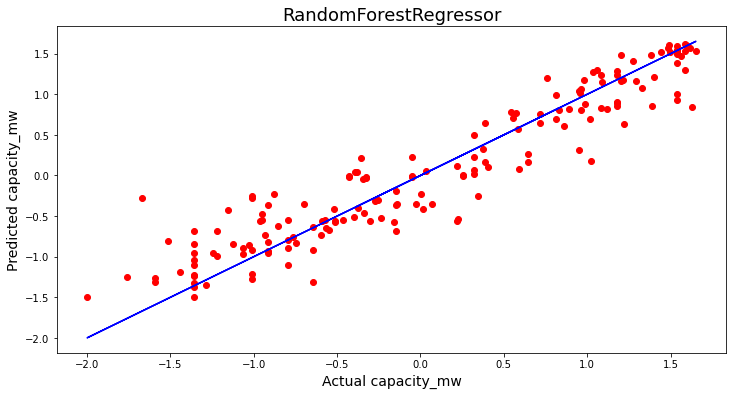

In [239]:
plt.figure(figsize=(12,6))
plt.scatter(x= y_test,y= pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual capacity_mw',fontsize=14)
plt.ylabel('Predicted capacity_mw',fontsize=14)
plt.title('RandomForestRegressor',fontsize=18)
plt.show()

In [234]:
# Final Model

In [240]:
import pickle
filename= 'churn.pkl'
pickle.dump(rfc, open(filename, 'wb'))

In [241]:
[]

[]

In [242]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result= loaded_model.score(X_test, y_test)
print(result*100)

88.86268089560822


In [243]:
conclusion= pd.DataFrame([loaded_model.predict(X_test)[:],y_test_pred[:]], index=['Predicted','Original'])

In [244]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
Predicted,0.805975,-0.644276,-0.568684,0.214750,-0.844683,-0.031926,0.815356,-0.557461,-0.277234,0.836496,...,-1.236110,0.160732,-0.354726,0.325394,0.492522,1.592367,-0.959010,1.524755,-0.818292,0.038333
Original,0.747786,-0.683257,-0.476292,0.136434,-0.720220,-0.174628,0.846127,-0.547013,-0.108186,0.801920,...,-1.408862,0.312565,-0.477809,0.332276,0.386988,1.609009,-1.137129,1.489673,-0.889816,0.021002


# Conclusion:


1) The accuracy score for Primary Fuel is 93%

2) The accuracy score for capacity_mw is 89%